# Before Start: 


<font color='red'>In Part 1 - Renaming columns could be run easily on local Jupyter Notebook, but our Kernel will die if we try to run them on Datanotebook.org. Cause one of the csvfile thta is just be downloaded using "wget" - actsum.csv is more than 25MB. Please check these codes  with your local Jupyter Notebook to make ture the codes will work sucessfully. Thank you for your attention.</font>

# FINAL PROJECT: ANALYSIS ON AMERICAN TIME USE



Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and
perform an initial exploration to determine which themes you wish to explore. Describe the questions you
want to be able to answer with the data, any concerns you have about the data, and any challenges you
expect to have to overcome.

# PART 1: INTRODUCTION

### Background information on ATUS:

The American Time Use Survey (ATUS) provides nationally representative estimates of how, where, and with whom Americans spend their time, and is the only federal survey providing data on the full range of nonmarket activities, from childcare to volunteering. As for the survey, individuals are randomly selected from households across the States. Respondents are interviewed only one time about how they spent their time on the previous day, where they were, and whom they were with. 

Overall, the data are collected on an ongoing, monthly basis, time-series data can be analyzed to identify any changes in how people spend their time. The whole dataset include 8 csv files of different theme. In order to focus on what really interests us, the data we chose to use are all from 2012-2015 in three csv files. The number of respondents involved are 90,000, so we have around 270,000 records for 3 years. 

All information about ATUS and data can be found here: http://www.bls.gov/tus/datafiles_0315.htm

### Descriptions of columns in selected files:

#### 1. ATUS Respondent File - (myresp.csv) : ATUS Respondent File contains case-specific variables collected in ATUS (that is, variables for which there is one value for each respondent). These include, for example, labor force status and earnings information.

| Column Name | Description|
| -----------|------------|
|TUCASEID|Unique identifier for each respondent involved in the survey|
|FAMILYMEMEBR|A number for each family member of the respondent(1 refer to the respondent itself)|
|WEEKDAY|Day of the week of diary day(day of the week about which the respondent was interviewed)|
|HOURLYINCOME|Hourly earnings at main job|
|WEEKLYINCOME|Weekly earnings at main job|
|KIDS|Presence of household children(younger than 18)|
|INDUSTRY|Detailed industry recode(main job)|
|OCCUPATION|Detailed occupation recode(main job)|
|TUYEAR|The year about which the respondent was interviewed|
|TUDIARYDATE|The date about which the respondent was interviewed|
|IFHOLIDAY|The day about which the respondent was interviewed is holiday or not|

#### 2. ATUS Activity Summary File - (mysum.csv): ATUS Activity Summary File contains information mainly about the total number of minutes each respondent spent doing each activity.
| Column Name | Description|
| -----------|------------|
|TUCASEID|Unique identifier for each respondent involved in the survey|
|PEDUCATION|The highest educational level of respondent|
|HISPANISH|Is the respondent hispanish|
|RACE|Race of the respondent|
|AGE|Age of the respondent|
|EMPLOYMENT|Labor force status|
|SEX|Gender|
|PA_EMPLOYMENT|Employment status of spouse or unmarried partner|
|CHILDREN|Number of household children (younger than 18)|
|WEEKLY_EARNING|Weekly earnings at main job|
|WEEKDAY|The weekday about which the respondent was interviewed|
|YEAR|The year about which the respondent was interviewed|
|STATWEIGHT|The statistical weights|
|PERSONALCARE|Activity Category 1 (sleeping,grooming and other personal & health-related care)|
|WORK|Activity Category 2 (work, work-related and other income-generating activities)|
|EADUCATION|Activity Category 3 (time spent on education and other academic-related activities)|
|PURCHASE|Activity Category 4 (all kinds of online & offline shopping and shopping-related activities)|
|PROFESSIONAL|Activity Category 5 (using professional services of various industries)|
|GOVERNMENT|Activity Category 6 (using government services and activities about civic obligations|
|EAT|Activity Category 7 (time spent on eating, drinking and other related activities|
|SOCIAL|Activity Category 8 (time spent on socializing, relaxing and leisure)|
|EXERCISE|Activity Category 9 (time spent on sports, exercise and recreation)|
|RELIGIOUS|Activity Category 10 (time spent on religious and spiritual practices)|
|VOLUNTEER|Activity Category 11 (time spent on volunteer-related activities)|
|CALL|Activity Category 12 (time spent on telephone calls)|
|TRAVEL|Activity Category 13 (time spent on traveling on business and non-business)|
|HOUSE|Activity Category 14 (time spent on household activities)|
|CARING|Activity Category 15 (time spent on caring for & helping household and non-household members)|
|OTHERS|Activity Category 16 (all of other activities that cannot classified.|


#### 3. ATUS CPS File - (mycps.csv): ATUS-CPS File contains information about family members of the survey respondents, like the geolocation information and all knids of background information on their families involved.

| Column Name | Description|
| -----------|------------|
|TUCASEID|Unique identifier for each respondent involved in the survey|
|FAMILYMEMEBR|A number for each family member of the respondent(1 refer to the respondent itself,2,3,4..refer to other members)|
|STATE|The state the family member lives in|
|FINCOME|Family income class|
|FEDUCATION|The highest education level of the family member|
|CITIZENSHIP|The citizenship of the family member|
|IFASIAN|If the family member is aisan|
|STATWEIGHT|The statistical weights|
|SERIESID|Unique id for each family member, generated by the function ( seriesID = tucaseid * 100 + tulineno)|

### Highlights of the data:

ATUS significantly furthers our understanding about how Americans spend their time. Because ATUS data are collected on an ongoing, monthly basis, time-series data can be analyzed to identify any changes in how people spend their time. Meanwhile, it really provides a wide range of applications for different users. All this information can help us understand how people in the United States are dividing their time among the duties of childcare; the demands of their jobs; their need to relax or exercise; and their religious, volunteer, and other commitments.


### Our interests:

1.What Americans do everyday? What's the common pattern of time use.

2.The differences of activity duration besed on each age group and gender.

3.For people who work in IT, analytic and computer-science industries, are there any behavior patterns in terms of daily time use. 

4.(Bonus Question): We pull in another dataset that is also collected during ATUS, called (ATUS) Well-Being Module Microdata Files(2010-2013) to see if there are any relationships between the well-being and the daily time use pattern of people who work in IT, analytics and computer-science industries, which we are really interested in since we are or will be ones of them. (More information will be explained in details in part4)

# PART 2: WRANGLING

### Data preparation: using Pandas for csv formatting and data cleaning

Columns in our selected files are all coded numerically. For the convenience of further exploration, we renamed the headers of columns with pandas.

In order to make the future query process easier, we used pandas to deal with our “missing values”. In those original files, “-1,-2,-3” stand for different kinds of missing values, like "unkown", "missing blank" and "refused". It’s better to not include the influence of missing values for calculating and for analysis purpose. So we use pandas to replace all “-1” to “unknown” so it would not be calculated in future queries. 

### 1. Renaming columns

For the summary table, we utilized pandas dataframe to merge the specific activities under the same categories into one broader, big category, for example, we have combined the sleeping (010101) and sleepless (010102) and other sleeping conditions (010199) into one activity as 01 and summed up the total time. At this point, we are going to analyze by 18 activities categories, not planning to go into the detailed categories such as what kind of sleeping. 


In [1]:
!wget https://https://github.com/gwsb-istm-6212-fall-2016/Xin-Yuan/raw/master/Archive.zip

--2016-12-09 07:09:58--  https://github.com/gwsb-istm-6212-fall-2016/Xin-Yuan/raw/master/Archive.zip
Resolving github.com... 192.30.253.112, 192.30.253.113
Connecting to github.com|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/Xin-Yuan/master/Archive.zip [following]
--2016-12-09 07:09:58--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/Xin-Yuan/master/Archive.zip
Resolving raw.githubusercontent.com... 151.101.32.133
Connecting to raw.githubusercontent.com|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6081465 (5.8M) [application/octet-stream]
Saving to: ‘Archive.zip’

Archive.zip         100%[===================>]   5.80M  5.44MB/s    in 1.1s    

2016-12-09 07:10:00 (5.44 MB/s) - ‘Archive.zip’ saved [6081465/6081465]



In [2]:
!unzip Archive.zip

Archive:  Archive.zip
  inflating: actcps.csv              
   creating: __MACOSX/
  inflating: __MACOSX/._actcps.csv   
  inflating: actresp.csv             
  inflating: __MACOSX/._actresp.csv  
  inflating: actsum.csv              
  inflating: __MACOSX/._actsum.csv   
  inflating: wbresp_1013.dat         
  inflating: __MACOSX/._wbresp_1013.dat  


<font color='red'>Following codes in Part 1 - Renaming columns could be run easily on local Jupyter Notebook, but our Kernel will die if we try to run them on Datanotebook.org. Cause one of the csvfile thta is just be downloaded using "wget" - actsum.csv is more than 25MB. Please check these codes with your local Jupyter Notebook</font>

In [3]:
#renaming columns in actsum.csv
import pandas as pd
df = pd.read_csv("actsum.csv",names = None, index_col = False)
mylist = ['t01','t02','t03','t04','t05','t06','t07','t08','t09','t10','t11','t12','t13','t14','t15','t16','t18','t50']
name_list = ['personalcare','household','caremember','caremember2','work','education','purchase','professional',
             'household2','government','eat','social','exercise','religious','volunteer','call','travel','others']
for i in mylist:
    select_cols = [col for col in df.columns if i in col]
    myindex = mylist.index(i)
    myname = name_list[myindex]
    df[myname]=df[select_cols].sum(axis=1)
    df.drop(select_cols, inplace=True, axis = 1)
    
select1=[col for col in df.columns if 'household' in col]
df['house']=df[select1].sum(axis=1)
df.drop(select1,inplace=True,axis=1)

select2=[col for col in df.columns if 'caremember' in col]
df['caring']=df[select2].sum(axis=1)
df.drop(select2,inplace=True,axis=1)

colnames=['tucaseid','peducation','hispanish','race','age','employment','sex','pa_employment',
         'children','weekly_earning','weekday','statweight','year','personalcare','work','education',
         'purchase','professional','government','eat','social','exercise','religious',
         'volunteer','call','travel','others','house','caring']

df.columns=colnames

df.to_csv('atussum.csv', index = False)

==============================================================================================

In [4]:
#renaming columns in actcps.csv
import pandas as pd
df = pd.read_csv("actcps.csv",names = None, index_col = False)
colnames=['tucaseid','familymember','state','fincome','feducation','citizenship','ifasian','statweight','seriesid']

df.columns=colnames

df.to_csv('atuscps.csv', index = False)

==============================================================================================

In [5]:
#renaming columns in actresp.csv
import pandas as pd
df = pd.read_csv("actresp.csv",names = None, index_col = False)
colnames=['tucaseid', 'familymember','occupation','hourlyincome','kids','industry','tuyear','tudiarydate','weekday','weeklyincome','ifholiday']

df.columns=colnames

df.to_csv('atusresp.csv', index = False)

### 2. Dealing with NULL values

In [6]:
#get a general picture of data 
import pandas as pd
df = pd.read_csv('atussum.csv', names= None, index_col = False)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tucaseid,46325.0,2.013517e+13,1.121331e+10,2.012010e+13,2.012121e+13,2.013121e+13,2.014121e+13,2.015121e+13
peducation,46325.0,4.047160e+01,2.838483e+00,3.100000e+01,3.900000e+01,4.000000e+01,4.300000e+01,4.600000e+01
hispanish,46325.0,1.854571e+00,3.525367e-01,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
race,46325.0,1.384350e+00,1.092573e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.500000e+01
age,46325.0,4.846817e+01,1.785621e+01,1.500000e+01,3.400000e+01,4.800000e+01,6.200000e+01,8.500000e+01
employment,46325.0,2.559244e+00,1.893587e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
sex,46325.0,1.557043e+00,4.967408e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
pa_employment,46325.0,2.015758e-01,1.214423e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
children,46325.0,8.017485e-01,1.123699e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01
weekly_earning,46325.0,5.032433e+04,6.884022e+04,-1.000000e+00,-1.000000e+00,1.812500e+04,8.076900e+04,2.884610e+05


In [7]:
#check the numebr of null values
import numpy as np
df = df.replace(-1,np.nan)
df.isnull().sum()

tucaseid              0
peducation            0
hispanish             0
race                  0
age                   0
employment            0
sex                   0
pa_employment     22473
children              0
weekly_earning    21482
weekday               0
statweight            0
year                  0
personalcare          0
work                  0
education             0
purchase              0
professional          0
government            0
eat                   0
social                0
exercise              0
religious             0
volunteer             0
call                  0
travel                0
others                0
house                 0
caring                0
dtype: int64

In [8]:
#replace null value with unknown
df.ix[df['pa_employment'].isnull(), 'pa_employment']= 'unknown'
df.ix[df['weekly_earning'].isnull(), 'weekly_earning']= 'unknown'

In [9]:
#check if all NULL values are turned into informative ones
df.isnull().sum()

tucaseid          0
peducation        0
hispanish         0
race              0
age               0
employment        0
sex               0
pa_employment     0
children          0
weekly_earning    0
weekday           0
statweight        0
year              0
personalcare      0
work              0
education         0
purchase          0
professional      0
government        0
eat               0
social            0
exercise          0
religious         0
volunteer         0
call              0
travel            0
others            0
house             0
caring            0
dtype: int64

In [10]:
#put clean data into new csv file for further exploration
df.to_csv('atussum_nonull.csv', index = False)

==============================================================================================

In [11]:
#steps likewise for aturesp.csv
import pandas as pd
df = pd.read_csv('atusresp.csv', names= None, index_col = False)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tucaseid,46325.0,2.013517e+13,1.121331e+10,2.012010e+13,2.012121e+13,2.013121e+13,2.014121e+13,2.015121e+13
familymember,46325.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
occupation,46325.0,6.593502e+00,8.124825e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,1.500000e+01,2.200000e+01
hourlyincome,46325.0,5.093567e+02,9.684911e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,9.000000e+02,9.999000e+03
kids,46325.0,1.571959e+00,4.948002e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
industry,46325.0,4.421651e+00,4.995445e+00,-1.000000e+00,-1.000000e+00,4.000000e+00,1.000000e+01,1.300000e+01
tuyear,46325.0,2.013452e+03,1.120613e+00,2.012000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03
tudiarydate,46325.0,2.013518e+07,1.121326e+04,2.012010e+07,2.012120e+07,2.013121e+07,2.014121e+07,2.015123e+07
weekday,46325.0,3.956028e+00,2.346227e+00,1.000000e+00,1.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
weeklyincome,46325.0,5.032433e+04,6.884022e+04,-1.000000e+00,-1.000000e+00,1.812500e+04,8.076900e+04,2.884610e+05


In [12]:
import numpy as np
df = df.replace(-1,np.nan)
df.isnull().sum()

tucaseid            0
familymember        0
occupation      18364
hourlyincome    32571
kids                0
industry        18364
tuyear              0
tudiarydate         0
weekday             0
weeklyincome    21482
ifholiday           0
dtype: int64

In [13]:
df.ix[df['hourlyincome'].isnull(), 'hourlyincome']= 'unknown'
df.ix[df['industry'].isnull(), 'industry']= 'unknown'
df.ix[df['occupation'].isnull(), 'occupation']= 'unknown'
df.ix[df['weeklyincome'].isnull(), 'weeklyincome']= 'unknown'

In [14]:
df.isnull().sum()

tucaseid        0
familymember    0
occupation      0
hourlyincome    0
kids            0
industry        0
tuyear          0
tudiarydate     0
weekday         0
weeklyincome    0
ifholiday       0
dtype: int64

In [15]:
df.to_csv('atusresp_nonull.csv', index = False)

================================================================================================

In [16]:
#steps likewise for atuscps.csv
import pandas as pd
df = pd.read_csv('atuscps.csv', names= None, index_col = False)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tucaseid,272311.0,2.013549e+13,1.118695e+10,2.012010e+13,2.012121e+13,2.013121e+13,2.014121e+13,2.015121e+13
familymember,272311.0,2.341837e+00,1.460130e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.600000e+01
state,272311.0,2.771708e+01,1.610392e+01,1.000000e+00,1.200000e+01,2.700000e+01,4.200000e+01,5.600000e+01
fincome,272311.0,1.077801e+01,4.103155e+00,1.000000e+00,8.000000e+00,1.200000e+01,1.400000e+01,1.600000e+01
feducation,272311.0,2.947927e+01,1.798408e+01,-1.000000e+00,-1.000000e+00,3.900000e+01,4.100000e+01,4.600000e+01
citizenship,272311.0,1.507868e+00,1.243160e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
ifasian,272311.0,-8.418499e-01,9.446336e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,7.000000e+00
statweight,272311.0,1.338827e+04,8.288056e+03,3.084860e+03,8.334192e+03,9.753039e+03,1.748675e+04,9.637177e+04
seriesid,272311.0,2.013549e+15,1.118695e+12,2.012010e+15,2.012121e+15,2.013121e+15,2.014121e+15,2.015121e+15


In [17]:
import numpy as np
df = df.replace(-1,np.nan)
df.isnull().sum()

tucaseid             0
familymember         0
state                0
fincome              0
feducation       69281
citizenship          0
ifasian         263183
statweight           0
seriesid             0
dtype: int64

In [18]:
df.ix[df['feducation'].isnull(), 'feducation']= 'unknown'
df.ix[df['ifasian'].isnull(), 'ifasian']= 'unknown'

In [19]:
df.isnull().sum()

tucaseid        0
familymember    0
state           0
fincome         0
feducation      0
citizenship     0
ifasian         0
statweight      0
seriesid        0
dtype: int64

In [20]:
df.to_csv('atuscps_nonull.csv', index = False)

# PART 3: ANALYSIS

### Question1:  What Americans do everyday? What's the common pattern of time use.

You may ask how can one person's activity choices represent a group's preference, cause in the general survey, respondents were interviewed on different days of a week, and the gender of them will also affect the response rate, the survey considered about this problem, and add a column called 'weight' in this dataset, this column can be used to estimate average activity duration of a group. in this project, we used this column to balance the standard error caused by these out of control errors.

The method is:

average duration of an activity of a group = sum(weight * activity duration per   person)/sum(weight of this group)

In [1]:
import pandas as pd
df = pd.read_csv('atussum_nonnull.csv', names = None, index_col = False)
df1_1 = df[['tucaseid','sex','age','statweight','personalcare','work',
'education','purchase','professional','government','eat','social','exercise','religious',
'volunteer','call','travel','others','house','caring']].copy()

activitylist=['personalcare','work','education','purchase','professional','government','eat',
              'social','exercise','religious','volunteer','call','travel','others','house',
              'caring']
#add weight to time spent on each activities
for i in activitylist:
    df1_1['w'+i]=df1_1['statweight']*df1_1[i]
df1_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tucaseid,46325.0,2.013516e+13,1.121329e+10,2.012010e+13,2.012120e+13,2.013120e+13,2.014120e+13,2.015120e+13
sex,46325.0,1.557043e+00,4.967408e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
age,46325.0,4.846817e+01,1.785621e+01,1.500000e+01,3.400000e+01,4.800000e+01,6.200000e+01,8.500000e+01
statweight,46325.0,7.918432e+06,7.155571e+06,6.586811e+05,3.318723e+06,5.833819e+06,9.857608e+06,1.370000e+08
personalcare,46325.0,5.796103e+02,1.440494e+02,0.000000e+00,4.950000e+02,5.700000e+02,6.550000e+02,1.440000e+03
work,46325.0,1.562521e+02,2.401982e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.367000e+03
education,46325.0,1.463249e+01,7.697992e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.005000e+03
purchase,46325.0,2.450800e+01,5.017383e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,1.055000e+03
professional,46325.0,4.526368e+00,2.558831e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+02
government,46325.0,3.729951e-01,8.401895e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.650000e+02


In [2]:
sum_weight = {} #a dictionary of all the time sepnt on different activities after weighted
for i in activitylist:
    a=  df1_1['w'+i].sum()
    sum_weight[i] = a
#print(sum_weight)

average = {} #a dictionary of average time spent on different activities
weight = df1_1['statweight'].sum()
for i in range(16):
    average[activitylist[i]]= sum_weight[activitylist[i]]/weight/60
#print(average) --- average time spent on different activities

In [3]:
#sort and list each activity based on their duration in the new dataframe(df1)
import pandas as pd
df1 = pd.DataFrame(list(average.items()), columns=['Activity', 'Duration'])
df1 = df1.sort_values(['Duration'], ascending=[False])
df1

,Activity,Duration
4,personalcare,9.547677
0,social,4.734476
14,work,3.258460
2,house,1.802989
7,travel,1.175659
10,eat,1.096399
8,caring,0.572310
11,education,0.433437
3,purchase,0.360799
9,exercise,0.330349


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2885: UserWarning: The `hline` parameter has been removed
  warnings.warn("The `hline` parameter has been removed", UserWarning)


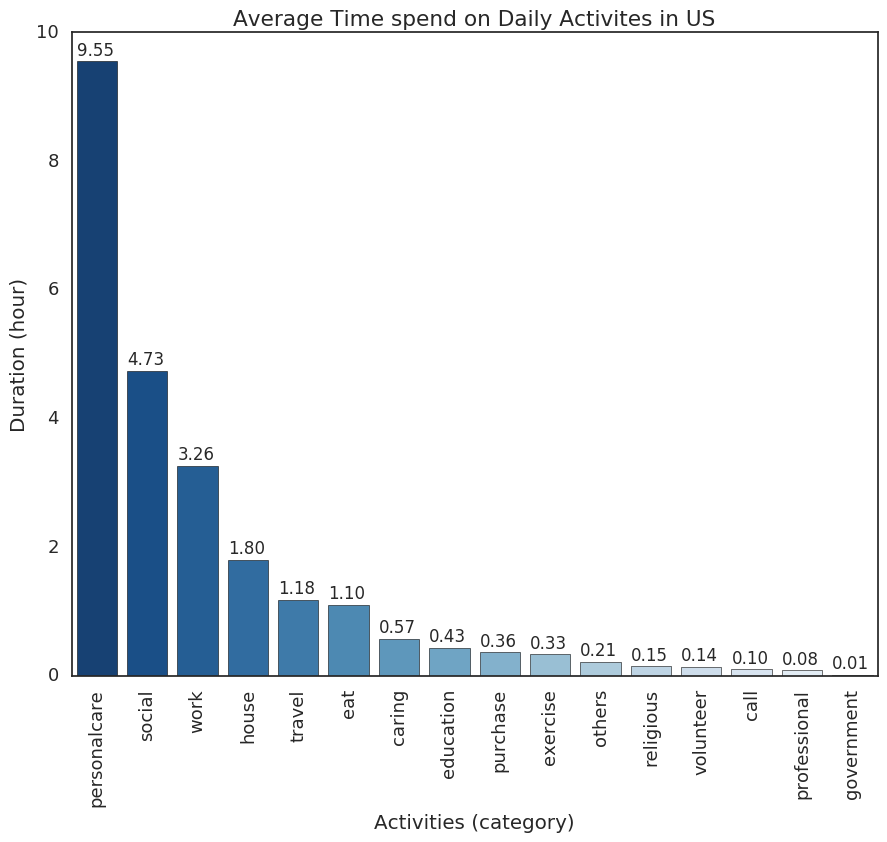

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
sns.set(style="white", context="talk")
(f, ax) = plt.subplots(1)
values = array(df1.Duration)
labels = array(df1.Activity)
b = sns.barplot(labels, values, ci = None, palette = "Blues_r", hline = 0, ax=ax)
ax.set_title("Average Time spend on Daily Activites in US")
ax.set_xlabel("Activities (category)")
ax.set_ylabel("Duration (hour)")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+0.1, '%.2f'%(height), size=12)
b.set_xticklabels(labels, rotation=90)
plt.subplots_adjust(bottom=0)
plt.show()

From the plot, we can see the top three activities Americans spend most of their time on are personal caring (sleeping,grooming and other personal & health-related care), social (time spent on socializing, relaxing and leisure) and work (work, work-related and other income-generating activities)

### Question2:  The differences of activity duration besed on each age group and gender.

We divided the age into four groups as below:

15--30

31--45

46--65

66--85

And then calculated the average time each age group spend in each kind of activities.

In [5]:
import pandas as pd
df1_1['agelevel']=0
df1_1.loc[df1_1['age']<=30, 'agelevel'] = 1
df1_1.loc[(30 < df1_1['age']) & (df1_1['age'] <=45), 'agelevel'] = 2
df1_1.loc[(45 < df1_1['age']) & (df1_1['age'] <=65), 'agelevel'] = 3
df1_1.loc[(65 < df1_1['age']) & (df1_1['age'] <=85), 'agelevel'] = 4
df1_1 #only contains weighted

,tucaseid,sex,age,statweight,personalcare,work,education,purchase,professional,government,...,wsocial,wexercise,wreligious,wvolunteer,wcall,wtravel,wothers,whouse,wcaring,agelevel
0,2.012010e+13,2,38,5241491.0,750,0,0,5,0,0,...,2.767507e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.048298e+07,0.0,4.979416e+08,0.000000e+00,2
1,2.012010e+13,2,17,8379003.0,675,0,0,0,0,0,...,1.005480e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.932651e+09,0.0,2.094751e+08,1.759591e+09,1
2,2.012010e+13,2,20,2383446.0,395,518,0,0,0,0,...,3.098480e+07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,9.533784e+06,0.0,3.575169e+07,1.048716e+09,1
3,2.012010e+13,1,58,9128555.0,620,10,0,10,0,0,...,5.367590e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.199135e+08,0.0,5.477133e+07,0.000000e+00,3
4,2.012010e+13,2,65,5360440.0,195,0,0,120,195,0,...,2.224583e+09,321626400.0,1.286506e+09,0.000000e+00,2.144176e+08,6.432528e+08,0.0,8.040660e+07,0.000000e+00,3
5,2.012010e+13,1,19,5045452.0,810,340,0,5,0,0,...,6.054542e+08,302727120.0,0.000000e+00,0.000000e+00,0.000000e+00,3.279544e+08,0.0,1.513636e+08,0.000000e+00,1
6,2.012010e+13,1,46,5461399.0,540,0,0,0,0,0,...,4.560268e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.549909e+08,0.000000e+00,3
7,2.012010e+13,2,24,6194342.0,735,0,0,160,0,0,...,1.752999e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.504059e+08,291134074.0,4.336039e+08,0.000000e+00,1
8,2.012010e+13,1,34,12200000.0,765,3,0,35,0,0,...,5.514400e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.451800e+09,122000000.0,3.172000e+08,0.000000e+00,2
9,2.012010e+13,1,40,8461286.0,495,0,0,45,0,0,...,1.396112e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.499836e+08,0.0,2.919144e+09,2.326854e+09,2


In [6]:
df1_2=df1_1.groupby(['agelevel'],as_index=False).sum()
df1_2.drop(df1_2[['tucaseid','age','sex','personalcare','work','education','purchase','professional','government','eat',
                  'social','exercise','religious','volunteer','call','travel','others','house','caring']],axis=1,
           inplace=True)

In [7]:
activity=['personalcare','work','education','purchase','professional','government','eat','social','exercise',
             'religious','volunteer','call','travel','others','house','caring']
for i in activity:
    df1_2['ave'+i]=df1_2['w'+i]/df1_2['statweight']/60
df1_2.drop(df1_2[['wpersonalcare','wwork','weducation','wpurchase','wprofessional',
                  'wgovernment','weat','wsocial','wexercise','wreligious','wvolunteer',
                  'wcall','wtravel','wothers','whouse','wcaring']],axis=1,
           inplace=True)
df1_2.drop('statweight',axis=1,inplace=True)
df1_2 #only contains averaged

,agelevel,avepersonalcare,avework,aveeducation,avepurchase,aveprofessional,avegovernment,aveeat,avesocial,aveexercise,avereligious,avevolunteer,avecall,avetravel,aveothers,avehouse,avecaring
0,1,10.003836,3.007571,1.412343,0.317789,0.051923,0.011170,0.993895,4.343570,0.467651,0.094526,0.083317,0.126161,1.230322,0.225374,1.067806,0.562746
1,2,9.272760,4.453831,0.146417,0.369357,0.062945,0.008460,1.063737,3.654752,0.302982,0.126071,0.115776,0.066991,1.296834,0.183217,1.806786,1.069086
2,3,9.268827,3.843734,0.040547,0.379518,0.095041,0.006433,1.103345,4.766942,0.270770,0.154112,0.148499,0.087168,1.197315,0.188350,2.074472,0.374929
3,4,9.750912,0.742968,0.011013,0.382393,0.144858,0.005312,1.301589,6.909904,0.261130,0.248904,0.229225,0.133256,0.862663,0.282551,2.479109,0.254213


/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2885: UserWarning: The `hline` parameter has been removed
  warnings.warn("The `hline` parameter has been removed", UserWarning)


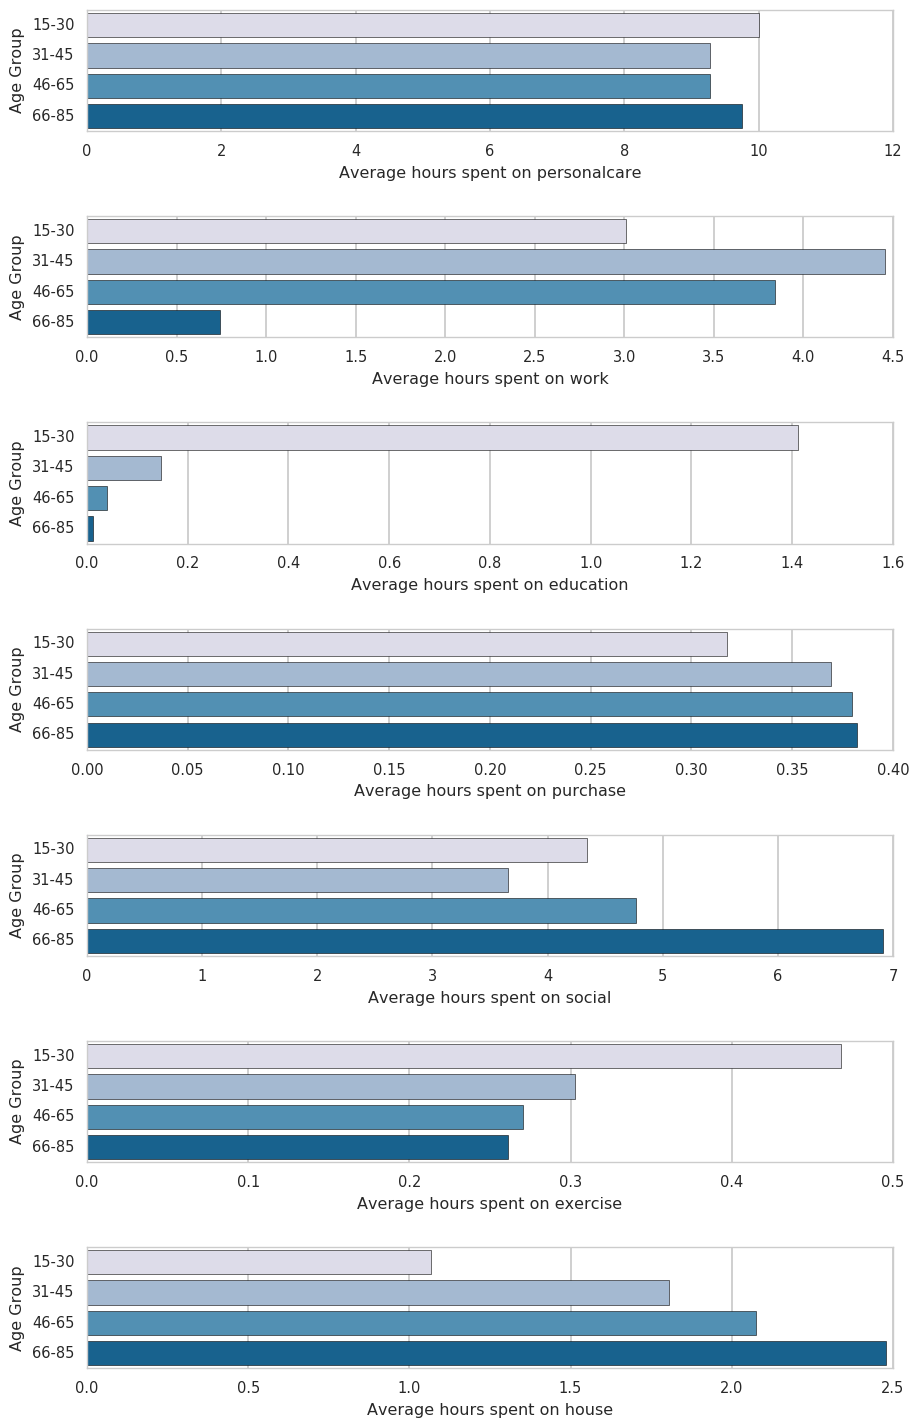

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
import numpy as np
from numpy import array

activities = ['personalcare','work','education','purchase','social','exercise',
             'house','caring']
fig = plt.figure()
ages = np.array(["15-30","31-45","46-65","66-85"])
sns.set(style="whitegrid", context="talk")

for i in range(7):
    a = 'ave'+activities[i]
    values = array(df1_2[a])
    temp = 710 + i + 1
    ax = plt.subplot(temp)
    b = sns.barplot(values,ages, ci = 0,palette = "PuBu", hline = 0, ax=ax, orient = "h")
    plt.subplots_adjust(hspace = 0.7, top = 2, bottom = 0.1)
    #temp = tic.MaxNLocator(3)
    ax.tick_params(axis='both', which='major', labelsize=10.5)
    #ax1.set_xticklabels(xticklabels, fontsize=7)
    ax.set_xlabel('Average hours spent on '+ activities[i], size = 11.5)
    ax.set_ylabel('Age Group', size = 11.5)
    ax.title.set_visible(False)

plt.show()

We can see from the above plots that some kinds of activities have great difference among different age group. To dig deeper, we added a new charactor, sex, into the above plot, to see if gender will affect people's choices on daily activities.

In [9]:
df1_3=df1_1.groupby(['sex','agelevel'],as_index=False).sum()
df1_3.drop(df1_3[['tucaseid','age','personalcare','work','education','purchase','professional','government','eat',
                  'social','exercise','religious','volunteer','call','travel','others','house','caring']],axis=1,
           inplace=True)
df1_3 #only contains weighted but grouped by age and sex

,sex,agelevel,statweight,wpersonalcare,wwork,weducation,wpurchase,wprofessional,wgovernment,weat,wsocial,wexercise,wreligious,wvolunteer,wcall,wtravel,wothers,whouse,wcaring
0,1,1,4.987976e+10,2.914171e+13,9.981320e+12,4.254729e+12,6.967519e+11,9.163958e+10,2.791986e+10,3.006493e+12,1.427449e+13,1.848104e+12,2.542195e+11,2.571051e+11,3.148195e+11,3.671626e+12,6.463539e+11,2.479687e+12,8.798925e+11
1,1,2,4.312725e+10,2.332193e+13,1.405771e+13,2.917186e+11,7.206003e+11,1.071744e+11,1.640309e+10,2.836349e+12,1.006313e+13,9.234785e+11,2.694280e+11,2.698110e+11,1.166250e+11,3.441563e+12,4.106176e+11,3.296843e+12,1.959851e+12
2,1,3,5.803286e+10,3.142991e+13,1.548279e+13,1.075446e+11,1.048634e+12,2.556281e+11,2.255852e+10,3.983662e+12,1.755392e+13,1.135368e+12,4.298485e+11,4.172771e+11,1.562484e+11,4.302101e+12,6.185066e+11,5.615468e+12,1.007862e+12
3,1,4,2.620196e+10,1.501910e+13,1.660131e+12,9.372788e+09,4.862038e+11,1.687987e+11,1.099956e+10,2.210721e+12,1.138296e+13,5.879346e+11,3.080837e+11,3.517170e+11,8.298680e+10,1.493901e+12,4.432543e+11,3.173592e+12,3.410745e+11
4,2,1,4.969306e+10,3.062490e+13,7.987017e+12,4.183130e+12,1.201837e+12,2.185705e+11,3.881315e+10,2.931404e+12,1.167560e+13,9.458144e+11,3.105151e+11,2.406641e+11,4.389121e+11,3.678771e+12,7.001111e+11,3.899778e+12,2.482161e+12
5,2,2,4.460896e+10,2.549148e+13,9.388019e+12,4.790433e+11,1.223760e+12,2.241765e+11,2.813289e+10,2.763348e+12,9.176112e+12,6.714693e+11,3.942307e+11,3.396530e+11,2.360288e+11,3.385193e+12,5.538673e+11,6.214388e+12,3.668005e+12
6,2,3,6.182995e+10,3.522935e+13,1.216045e+13,1.840571e+11,1.680772e+12,4.278846e+11,2.370331e+10,3.951340e+12,1.672883e+13,8.119451e+11,6.784878e+11,6.506905e+11,4.706459e+11,4.308708e+12,7.360639e+11,9.303658e+12,1.688539e+12
7,2,4,3.344758e+10,1.987915e+13,9.989311e+11,3.004374e+10,8.823712e+11,3.496440e+11,8.010801e+09,2.447632e+12,1.334740e+13,3.466415e+11,5.827384e+11,4.686739e+11,3.939310e+11,1.593548e+12,5.679870e+11,5.699072e+12,5.687473e+11


In [10]:
aveactivity=['personalcare','work','education','purchase','professional','government','eat','social','exercise',
             'religious','volunteer','call','travel','others','house','caring']
for i in aveactivity:
    df1_3['ave'+i]=df1_3['w'+i]/df1_3['statweight']
df1_3.drop(df1_3[['sex','agelevel','statweight','wpersonalcare','wwork','weducation','wpurchase','wprofessional','wgovernment','weat','wsocial',
                  'wexercise','wreligious','wvolunteer','wcall','wtravel','wothers','whouse','wcaring']],axis=1,inplace=True)
df1_3 #contains only averaged but grouped by age and sex

,avepersonalcare,avework,aveeducation,avepurchase,aveprofessional,avegovernment,aveeat,avesocial,aveexercise,avereligious,avevolunteer,avecall,avetravel,aveothers,avehouse,avecaring
0,584.239105,200.107627,85.299703,13.968631,1.837210,0.559743,60.274806,286.177945,37.051186,5.096646,5.154498,6.311568,73.609539,12.958241,49.713282,17.640272
1,540.770123,325.958998,6.764137,16.708702,2.485074,0.380342,65.766992,233.335829,21.412880,6.247282,6.256162,2.704208,79.800198,9.521072,76.444555,45.443448
2,541.588074,266.793566,1.853167,18.069663,4.404885,0.388720,68.644924,302.482318,19.564221,7.406984,7.190358,2.692412,74.132158,10.657868,96.763591,17.367093
3,573.205227,63.359019,0.357713,18.556005,6.442215,0.419799,84.372336,434.431398,22.438570,11.758037,13.423308,3.167198,57.014839,16.916834,121.120368,13.017134
4,616.281308,160.727024,84.179365,24.185211,4.398412,0.781058,58.990207,234.954403,19.033129,6.248661,4.843013,8.832463,74.029870,14.088709,78.477313,49.949854
5,571.443021,210.451405,10.738724,27.433050,5.025368,0.630656,61.946021,205.701081,15.052340,8.837477,7.614009,5.291062,75.885931,12.416053,139.308068,82.225735
6,569.778164,196.675698,2.976828,27.183793,6.920346,0.383363,63.906576,270.561859,13.131907,10.973450,10.523874,7.611941,69.686433,11.904650,150.471706,27.309412
7,594.337313,29.865571,0.898233,26.380716,10.453491,0.239503,73.178143,399.054276,10.363722,17.422438,14.012191,11.777563,47.643147,16.981406,170.388147,17.004139


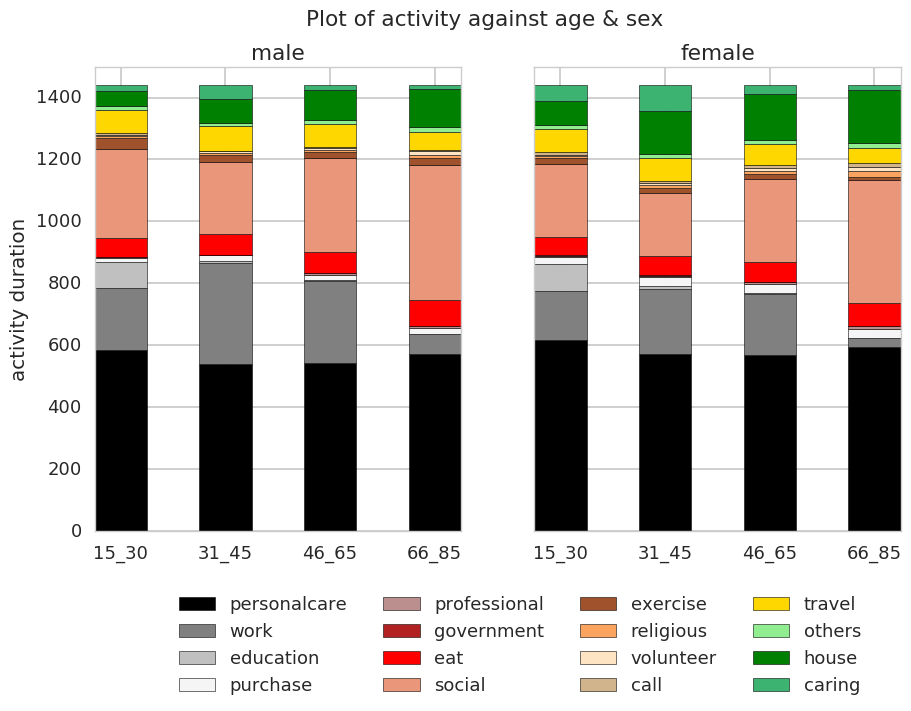

In [11]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

#prepare data for ploting
array = array(df1_3)
array = np.split(array,2)
array_plot1 = array[0].transpose()
array_plot2 = array[1].transpose()

#set stack layout
c_1 = array_plot1
c_1_colors = ['black','grey','silver','whitesmoke','rosybrown','firebrick','r','darksalmon',
             'sienna','sandybrown','bisque','tan','gold','lightgreen','green','mediumseagreen']
c_1_labels = ['personalcare','work','education','purchase','professional','government','eat','social','exercise',
             'religious','volunteer','call','travel','others','house','caring']
c_2 = array_plot2
c_2_colors = c_1_colors
c_2_labels = ['personalcare','work','education','purchase','professional','government','eat','social','exercise',
             'religious','volunteer','call','travel','others','house','caring']

#two cluster for male and female
ind = np.arange(4)    
width = 0.5     
f, ax = plt.subplots(1, 2, sharey=True, sharex=True)
f.subplots_adjust(bottom=0.25)                       #make room for the legend
#plt.yticks(np.arange(0,18,2))
plt.xticks(ind+width/2., ('15_30', '31_45', '46_65','66_85'))  #15—30， 31—45， 46—65， 66--85
plt.suptitle('Plot of activity against age & sex')
p = [] # list of bar properties
def create_subplot(matrix, axis, title, colors): #colors
    bar_renderers = []
    ind = np.arange(matrix.shape[1])
    bottoms = np.cumsum(np.vstack((np.zeros(matrix.shape[1]), matrix)), axis=0)[:-1]
    for i, row in enumerate(matrix):
        r = axis.bar(ind, row, width=0.5, bottom=bottoms[i],color=colors[i]) #color=colors[i]
        bar_renderers.append(r)
    axis.set_title(title)
    return bar_renderers
    
p.extend(create_subplot(c_1, ax[0], 'male',c_1_colors)) #c_1_colors
p.extend(create_subplot(c_2, ax[1], 'female',c_2_colors)) #c_2_colors
ax[0].set_ylabel('activity duration') # add left y label
ax[0].set_ybound(0, 1500) # add buffer at the top of the bars
f.legend(((x[0] for x in p)), # bar properties
         (c_1_labels),  # + c_2_labels
         bbox_to_anchor=(0.5, 0), 
         loc='lower center',
         ncol=4)
plt.show()

From the stacked and grouped plot above, it seems there's not many differences across each age group and gender. Overall, male tend to spend more time on work (work, work-related and other income-generating activities) and social (time spent on socializing, relaxing and leisure) than female in all age groups, while female usually spend more time on house (time spent on household activities), caring (time spent on caring for & helping household and non-household members), purchase (all kinds of online & offline shopping and shopping-related activities) than male in all age groups.
 

Another question that interest us is how people doing jobs that related to data science will choose to spend their daily life, we found the occupation information of the respondents in 'atusresp.csv'.

### Question3:   For people who work in IT, analytic and computer-science industries, are there any behavior patterns in terms of daily time use. 

atusresp.csv contains information about the occupation of our respondents and the industry they work in. We combined these information in our calculation.

| Occupation index | Description|
| -----------|------------|
|1|Management occupations|
|2|Business and financial operations occupations|
|3|Computer and mathematical science occupations|
|4|Architecture and engineering occupations|
|5|Life, physical, and social science occupations|
|6|Community and social service occupations|
|7|Legal occupations|
|8|Education, training, and library occupations|
|9|Arts, design, entertainment, sports, and media occupations|
|10|Healthcare practitioner and technical occupations|
|11|Healthcare support occupations|
|12|Protective service occupations|
|13|Food preparation and serving related occupations|
|14|Building and grounds cleaning and maintenance occupations|
|15|Personal care and service occupations|
|16|Sales and related occupations|
|17|Office and administrative support occupations|
|18|Farming, fishing, and forestry occupations|
|19|Construction and extraction occupations|
|20|Installation, maintenance, and repair occupations|
|21|Production occupations|
|22|Transportation and material moving occupations|

| Industry index | Description|
| -----------|------------|
|1|Agriculture, forestry, fishing, and hunting |
|2|Mining|
|3|Construction|
|4|Manufacturing|
|5|Wholesale and retail trade|
|6|Transportation and utilities|
|7|Information|
|8|Financial activities|
|9|Professional and business services|
|10|Educational and health services|
|11|Leisure and hospitality|
|12|Other services|
|13|Public administration|

In [12]:
import pandas as pd
resdf=pd.read_csv('atusresp_nonull.csv',names = None, index_col = False)
resdf['datascience']='N'

In [13]:
resdf.loc[(resdf['occupation']=='3.0')|(resdf['industry']=='7.0'), 'datascience'] = 'Y'

In [14]:
job = resdf[resdf.datascience == 'Y']
job.count()['familymember']

1530

In [15]:
result = pd.concat([df1_1, job], axis=1, join='inner')
result.count()['datascience']

1530

Since these two number(1530=1530) are equal, the inner join action is correct. In our dataset, there are 1530 people have jobs related to data science.

In [16]:
result.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tucaseid,1530.0,2.013575e+13,1.130715e+10,2.012010e+13,2.012120e+13,2.014010e+13,2.015010e+13,2.015120e+13
sex,1530.0,1.316340e+00,4.651993e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
age,1530.0,4.211046e+01,1.147484e+01,1.600000e+01,3.400000e+01,4.150000e+01,5.000000e+01,8.500000e+01
statweight,1530.0,7.574321e+06,6.940975e+06,8.088583e+05,3.129296e+06,5.837402e+06,9.089997e+06,7.850000e+07
personalcare,1530.0,5.519863e+02,1.205454e+02,5.800000e+01,4.800000e+02,5.400000e+02,6.150000e+02,1.307000e+03
work,1530.0,2.480889e+02,2.582067e+02,0.000000e+00,0.000000e+00,1.200000e+02,4.900000e+02,1.050000e+03
education,1530.0,6.081699e+00,4.237874e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.600000e+02
purchase,1530.0,2.746078e+01,5.357141e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,5.250000e+02
professional,1530.0,3.962092e+00,2.489415e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.390000e+02
government,1530.0,6.078431e-01,1.285413e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.550000e+02


In [17]:
result.drop(result[['familymember','kids','tuyear','tudiarydate','weekday','ifholiday','age','personalcare','work','education','purchase','professional','government','eat',
                  'social','exercise','religious','volunteer','call','travel','others','house','caring']],axis=1,
           inplace=True)

In [18]:
result=result.groupby(['sex'],as_index=False).sum()
result

,sex,tucaseid,statweight,wpersonalcare,wwork,weducation,wpurchase,wprofessional,wgovernment,weat,...,wexercise,wreligious,wvolunteer,wcall,wtravel,wothers,whouse,wcaring,agelevel,tucaseid
0,1,2.106222e+16,8.234879e+09,4.388135e+12,2.792582e+12,6.158486e+10,1.555829e+11,2.833176e+10,2.233357e+09,5.867621e+11,...,2.176692e+11,3.536023e+10,6.384935e+10,2.504752e+10,6.755149e+11,1.018954e+11,5.128352e+11,2.157054e+11,2295,21062231873176252
1,2,9.745476e+15,3.353832e+09,1.875285e+12,1.028448e+12,2.550553e+10,9.241801e+10,1.336704e+10,1.987968e+09,2.250356e+11,...,4.867550e+10,1.942725e+10,1.706776e+10,1.663155e+10,2.687244e+11,2.620663e+10,3.397006e+11,1.024420e+11,1137,9745478969441234


In [19]:
aveactivity=['personalcare','work','education','purchase','professional','government','eat','social','exercise',
             'religious','volunteer','call','travel','others','house','caring']
for i in aveactivity:
    result['ave'+i]=result['w'+i]/result['statweight']/60
result.drop(result[['wpersonalcare','wwork','weducation','wpurchase','wprofessional','wgovernment','weat','wsocial',
                  'wexercise','wreligious','wvolunteer','wcall','wtravel','wothers','whouse','wcaring']],axis=1,
           inplace=True)

In [20]:
result.drop(result[['tucaseid','statweight','agelevel']],axis=1,
           inplace=True)
result

,sex,avepersonalcare,avework,aveeducation,avepurchase,aveprofessional,avegovernment,aveeat,avesocial,aveexercise,avereligious,avevolunteer,avecall,avetravel,aveothers,avehouse,avecaring
0,1,8.881196,5.651938,0.124642,0.314886,0.057341,0.004520,1.187555,4.037982,0.440543,0.071566,0.129225,0.050694,1.367182,0.206227,1.037933,0.436569
1,2,9.319114,5.110811,0.126748,0.459266,0.066427,0.009879,1.118301,3.620712,0.241890,0.096543,0.084817,0.082649,1.335410,0.130232,1.688121,0.509079


/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2885: UserWarning: The `hline` parameter has been removed
  warnings.warn("The `hline` parameter has been removed", UserWarning)


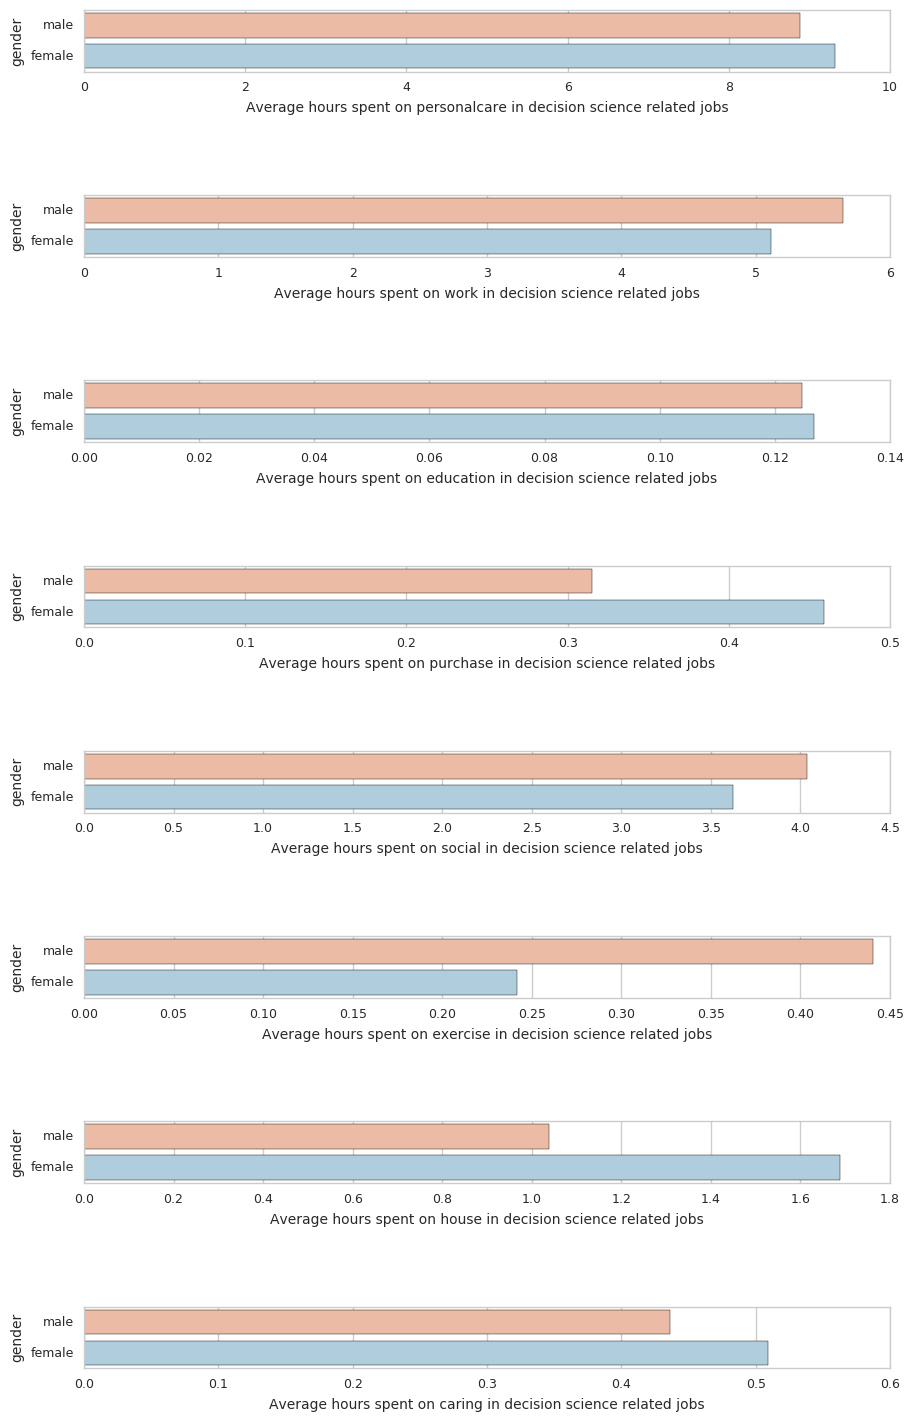

In [21]:
import numpy as np
from numpy import array
activities2 = ['personalcare','work','education','purchase','social','exercise','house','caring']
fig = plt.figure()
gender = ['male','female']
sns.set(style="whitegrid", context="notebook")

for i in range(8):
    a = 'ave'+activities2[i]
    values = array(result[a])
    temp = 810 + i + 1
    ax = plt.subplot(temp)
    b = sns.barplot(values, gender, palette = "RdBu", hline = 0, ax=ax, orient = "h")
    plt.subplots_adjust(hspace = 2, top = 2, bottom = 0.1)
    #temp = tic.MaxNLocator(3)
    ax.tick_params(axis='both', which='major', labelsize=9)
    #ax1.set_xticklabels(xticklabels, fontsize=7)
    ax.set_xlabel('Average hours spent on '+ activities[i] + ' in decision science related jobs', size = 10)
    ax.set_ylabel('gender', size = 10)
    ax.title.set_visible(False)

plt.show()

# Define a database model

Now we think it's time to define a database model and use star schema to do some further explorations. 

In [1]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [2]:
!createdb -U dbuser final

In [3]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [4]:
%sql postgresql://dbuser@localhost:5432/final

'Connected: dbuser@final'

In [5]:
!csvcut -n ourcps_nonull.csv

  1: tucaseid
  2: tulineno
  3: state
  4: fincome
  5: feducation
  6: citizenship
  7: ifasian
  8: tubwgt
  9: seriesID


In [6]:
!wc -l ourcps_nonull.csv

272311 ourcps_nonull.csv


In [7]:
!csvstat ourcps_nonull.csv

  1. tucaseid
	<class 'float'>
	Nulls: False
	Min: 20120100000000.0
	Max: 20151200000000.0
	Sum: 5.483114066900302e+18
	Mean: 20135485040634.797
	Median: 20131200000000.0
	Standard Deviation: 11186917219.155626
	Unique values: 48
	5 most frequent values:
		20120100000000.0:	6746
		20131100000000.0:	6582
		20130400000000.0:	6338
		20120900000000.0:	6229
		20130800000000.0:	6191
  2. tulineno
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 16
	Sum: 637708
	Mean: 2.341837090679407
	Median: 2
	Standard Deviation: 1.4601278007549778
	Unique values: 16
	5 most frequent values:
		1:	99141
		2:	72920
		3:	47167
		4:	30376
		5:	13597
  3. state
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 56
	Sum: 7547665
	Mean: 27.71707716544686
	Median: 27
	Standard Deviation: 16.10388797208016
	Unique values: 51
	5 most frequent values:
		6:	33523
		48:	22577
		36:	15716
		12:	14316
		17:	11194
  4. fincome
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 16
	Sum: 2934971
	Mean: 10.778011171050746
	Median: 12
	Standard D

In [8]:
!head -1 ourcps_nonull.csv | csvlook

|-----------+----------+-------+---------+------------+-------------+---------+--------+-----------|
|  tucaseid | tulineno | state | fincome | feducation | citizenship | ifasian | tubwgt | seriesID  |
|-----------+----------+-------+---------+------------+-------------+---------+--------+-----------|


In [9]:
%%sql
DROP TABLE IF EXISTS cps;
CREATE TABLE cps (
    tucaseid VARCHAR(64),
    tulineno INTEGER,
    state INTEGER,
    fincome VARCHAR(64),
    feducation VARCHAR(64),
    citizenship INTEGER,
    ifasian VARCHAR(64),
    tubwgt FLOAT,
    seriesID VARCHAR(64)
)

Done.
Done.


[]

In [10]:
!pwd

/home/jovyan/work


In [11]:
%%sql
COPY cps FROM '/home/jovyan/work/ourcps_nonull.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

272311 rows affected.


[]

In [12]:
%%sql
SELECT *
FROM cps
LIMIT 10;

10 rows affected.


tucaseid,tulineno,state,fincome,feducation,citizenship,ifasian,tubwgt,seriesid
2.01201E+13,1,12,11,39,1,unknown,13624.9,2.01201E+15
2.01201E+13,2,12,11,43,1,unknown,13624.9,2.01201E+15
2.01201E+13,3,12,11,36,1,unknown,13624.9,2.01201E+15
2.01201E+13,4,12,11,unknown,1,unknown,13624.9,2.01201E+15
2.01201E+13,1,51,1,36,1,unknown,15928.98,2.01201E+15
2.01201E+13,2,51,1,36,1,unknown,15928.98,2.01201E+15
2.01201E+13,3,51,1,39,1,unknown,15928.98,2.01201E+15
2.01201E+13,4,51,1,36,1,unknown,15928.98,2.01201E+15
2.01201E+13,5,51,1,unknown,1,unknown,15928.98,2.01201E+15
2.01201E+13,6,51,1,unknown,1,unknown,15928.98,2.01201E+15


### From the 270,000 respondents, we are interested in those group of people who have a education background higher than a bachelor degree and the geographical distribution of those higher education level group.

In [55]:
!pwd

/home/jovyan/work


In [56]:
from IPython.display import Image
PATH = "/home/jovyan/work/"

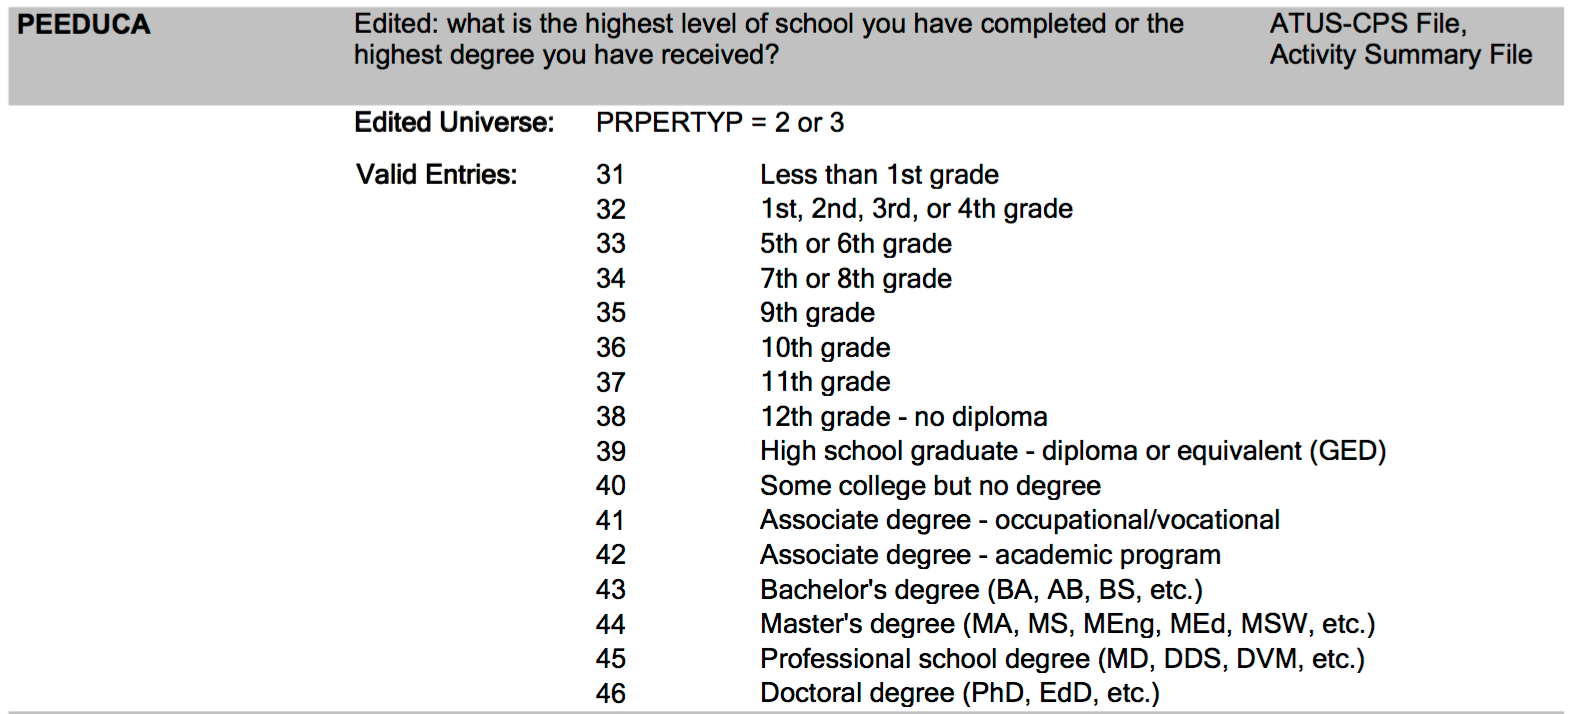

In [59]:
Image(filename = PATH + "degree.png", width=1000, height=1000)

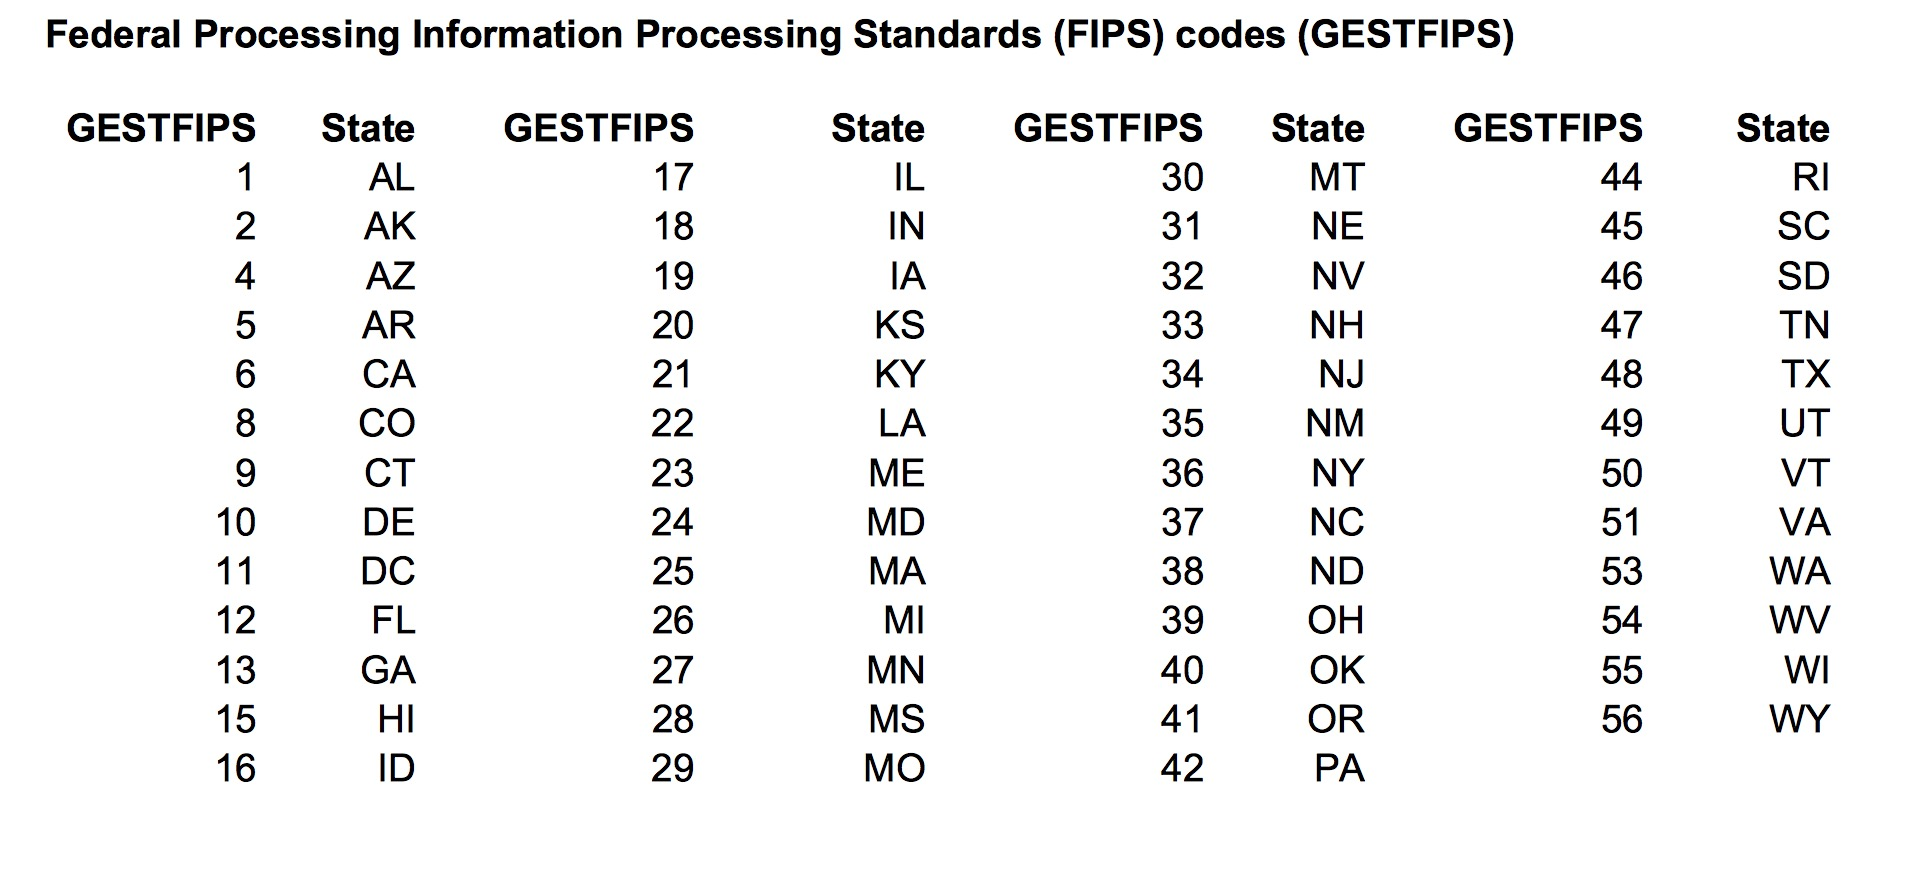

In [60]:
Image(filename = PATH + "state.png", width=1000, height=1000)

In [62]:
%%sql
SELECT state,COUNT(feducation) as "count_edu"
from cps
WHERE feducation > '43'
GROUP BY state
ORDER BY COUNT(feducation) DESC
LIMIT 15 
;

15 rows affected.


state,count_edu
6,10569
48,7209
36,5058
12,4047
17,3780
42,3360
39,2924
26,2775
51,2765
13,2580


### CA with no doubt is the state which owns the highest level of respondents educational background, followed by TX, NY, FL and IL. VA ranked 9th in the top 10. 

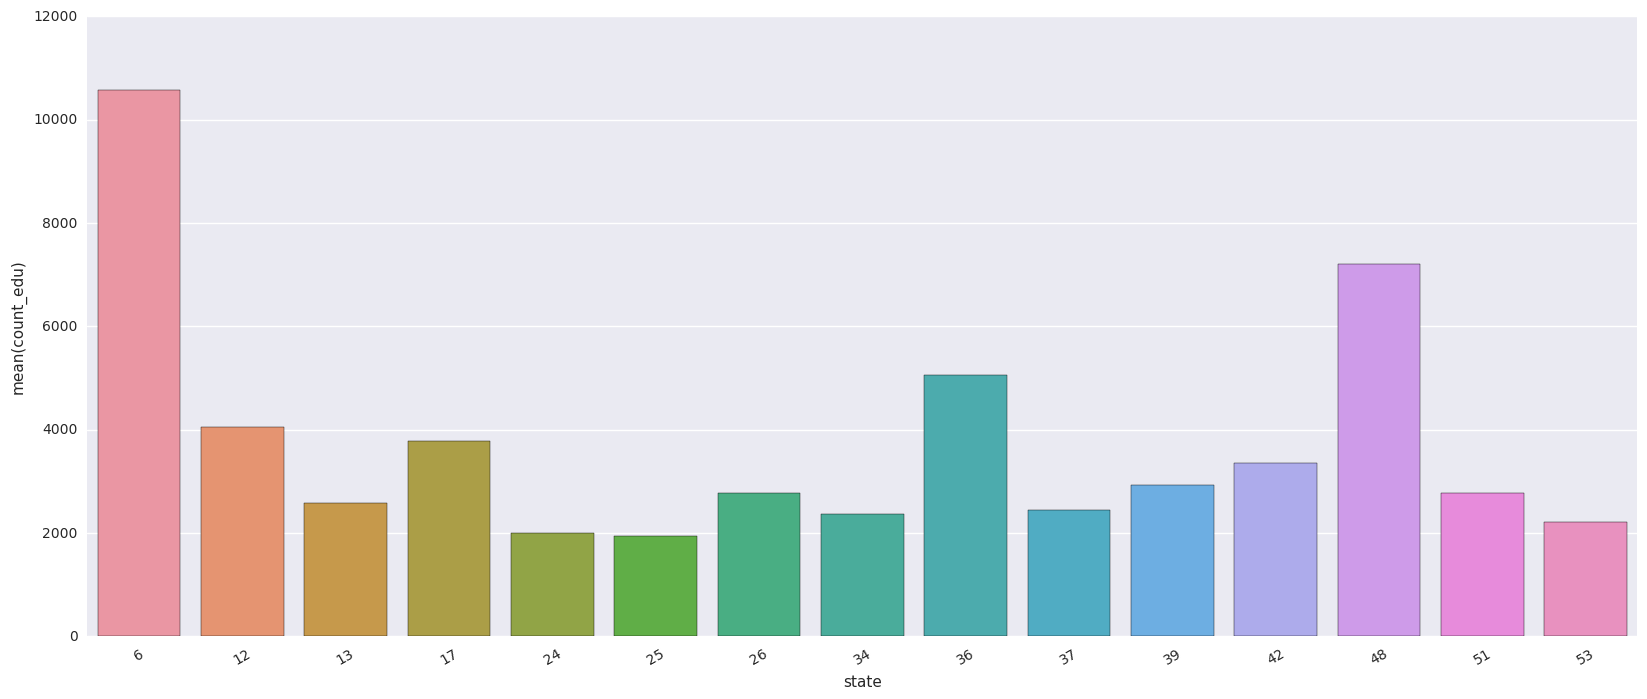

In [63]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc

d = _.DataFrame()
rc('figure', figsize=(20, 8))
splt = sns.barplot(x='state', y='count_edu', data=d)
labels = [l for l in splt.get_xmajorticklabels()]
splt.set_xticklabels(labels, rotation=30)

## Now we move on to create database for our star schema. 

In [20]:
!csvcut -n starschema.csv

  1: houseid
  2: peducation
  3: hispanish
  4: race
  5: age
  6: employment
  7: sex
  8: pa_employment
  9: children
 10: wincome
 11: date
 12: weight
 13: year
 14: personalcare
 15: work
 16: education
 17: purchase
 18: professional
 19: government
 20: eat
 21: social
 22: exercise
 23: religious
 24: volunteer
 25: call
 26: travel
 27: others
 28: house
 29: caring
 30: familymember
 31: hourly_earning
 32: child_presence
 33: major_industry
 34: major_occupation
 35: class_worker
 36: weekday
 37: weekly_earning
 38: statweight


In [21]:
!wc -l starschema.csv

46325 starschema.csv


In [22]:
!csvstat starschema.csv

  1. houseid
	<class 'float'>
	Nulls: False
	Min: 20120100000000.0
	Max: 20151200000000.0
	Sum: 9.32761309e+17
	Mean: 20135160474905.56
	Median: 20131200000000.0
	Standard Deviation: 11213168006.479614
	Unique values: 48
	5 most frequent values:
		20120100000000.0:	1400
		20130400000000.0:	1108
		20120700000000.0:	1094
		20120400000000.0:	1094
		20150300000000.0:	1088
  2. peducation
	<class 'int'>
	Nulls: False
	Min: 31
	Max: 46
	Sum: 1874847
	Mean: 40.471602806260115
	Median: 40
	Standard Deviation: 2.838452690276834
	Unique values: 16
	5 most frequent values:
		39:	11608
		43:	9597
		40:	8091
		44:	4426
		42:	2639
  3. hispanish
	<class 'int'>
	Nulls: False
	Values: 1, 2
  4. race
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 25
	Sum: 64130
	Mean: 1.384349703184026
	Median: 1
	Standard Deviation: 1.0925608582728816
	Unique values: 21
	5 most frequent values:
		1:	36518
		2:	6926
		4:	1843
		3:	327
		7:	276
  5. age
	<class 'int'>
	Nulls: False
	Min: 15
	Max: 85
	Sum: 2245288
	Mean: 48.

In [23]:
!head -1 starschema.csv | csvlook

|----------+------------+-----------+------+-----+------------+-----+---------------+----------+---------+------+--------+------+--------------+------+-----------+----------+--------------+------------+-----+--------+----------+-----------+-----------+------+--------+--------+-------+--------+--------------+----------------+----------------+----------------+------------------+--------------+---------+----------------+-------------|
|  houseid | peducation | hispanish | race | age | employment | sex | pa_employment | children | wincome | date | weight | year | personalcare | work | education | purchase | professional | government | eat | social | exercise | religious | volunteer | call | travel | others | house | caring | familymember | hourly_earning | child_presence | major_industry | major_occupation | class_worker | weekday | weekly_earning | statweight  |
|----------+------------+-----------+------+-----+------------+-----+---------------+----------+---------+------+--------+------

In [24]:
%%sql
DROP TABLE IF EXISTS final;
CREATE TABLE final (
    houseid VARCHAR(64),
    peducation INTEGER,
    hispanish INTEGER,
    race INTEGER,
    age INTEGER,
    employment INTEGER,
    sex INTEGER,
    pa_employment VARCHAR(64),
    children INTEGER,
    wincome VARCHAR(64),
    date INTEGER,
    weight FLOAT,
    year INTEGER,
    personalcare INTEGER,
    work INTEGER,
    education INTEGER,
    purchase INTEGER,
    professional INTEGER,
    government INTEGER,
    eat INTEGER,
    social INTEGER,
    exercise INTEGER,
    religious INTEGER,
    volunteer INTEGER,
    call INTEGER,
    travel INTEGER,
    others INTEGER,
    house INTEGER,
    caring INTEGER,
    familymember INTEGER,
    hourly_earning VARCHAR(64),
    child_presence INTEGER,
    major_industry VARCHAR(64),
    major_occupation VARCHAR(64),
    class_worker VARCHAR(64),
    weekday INTEGER,
    weekly_earning VARCHAR(64),
    statweight FLOAT 
)

Done.
Done.


[]

In [25]:
!pwd

/home/jovyan/work


In [26]:
%%sql
COPY final FROM '/home/jovyan/work/starschema.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

46325 rows affected.


[]

In [27]:
%%sql
SELECT *
FROM final
LIMIT 10;

10 rows affected.


houseid,peducation,hispanish,race,age,employment,sex,pa_employment,children,wincome,date,weight,year,personalcare,work,education,purchase,professional,government,eat,social,exercise,religious,volunteer,call,travel,others,house,caring,familymember,hourly_earning,child_presence,major_industry,major_occupation,class_worker,weekday,weekly_earning,statweight
2.01201E+13,39,2,1,38,4,2,2,2,unknown,1,5241491.0,2012,750,0,0,5,0,0,60,528,0,0,0,0,2,0,95,0,1,2074,1,4,9,4,1,86060,3554938.0
2.01201E+13,36,2,2,17,4,2,unknown,4,unknown,1,8379003.0,2012,675,0,0,0,0,0,60,120,0,0,0,0,350,0,25,210,1,1970,1,13,3,3,1,79200,1875167.0
2.01201E+13,40,2,2,20,1,2,unknown,1,30800,7,2383446.0,2012,395,518,0,0,0,0,55,13,0,0,0,0,4,0,15,440,1,unknown,1,7,1,4,1,288461,1225261.0
2.01201E+13,35,2,1,58,1,1,2,0,unknown,7,9128555.0,2012,620,10,0,10,0,0,160,588,0,0,0,0,46,0,6,0,1,2500,2,10,1,4,1,100000,2029450.0
2.01201E+13,35,2,2,65,1,2,unknown,0,20000,5,5360440.0,2012,195,0,0,120,195,0,40,415,60,240,0,40,120,0,15,0,1,unknown,2,unknown,unknown,unknown,1,unknown,2815798.0
2.01201E+13,33,1,1,19,1,1,unknown,0,25600,7,5045452.0,2012,810,340,0,5,0,0,10,120,60,0,0,0,65,0,30,0,1,1200,2,4,9,4,2,48000,17900000.0
2.01201E+13,42,2,2,46,5,1,unknown,0,unknown,6,5461399.0,2012,540,0,0,0,0,0,0,835,0,0,0,0,0,0,65,0,1,960,2,11,3,4,3,49920,13100000.0
2.01201E+13,43,2,1,24,1,2,2,0,192307,1,6194342.0,2012,735,0,0,160,0,0,40,283,0,0,0,0,105,47,70,0,1,unknown,2,10,3,2,1,62500,9939549.0
2.01201E+13,39,2,2,34,4,1,unknown,0,unknown,4,12200000.0,2012,765,3,0,35,0,0,30,452,0,0,0,0,119,10,26,0,1,1139,1,5,2,4,3,42143,6683633.0
2.01201E+13,43,2,1,40,5,1,1,2,unknown,2,8461286.0,2012,495,0,0,45,0,0,50,165,0,0,0,0,65,0,345,275,1,unknown,1,5,2,4,3,192307,8188074.0


# Star schema

After getting familiar with the data, we decided to orgainze this dataset into three dimension tables and one fact table. The dimension tables are work_D, info_D, and act_D respectively. 

Work_D contains the inforamtion related to work type such as occupations, industries and earnings. 

Info_D provides the basic information about the survey respondents' detailed information such as: age, sex and race.

Act_D gives us a list of the activities that is measured in the survey, all kinds of activities has been catorgorized into 18 catergories with 3 tier sub-categories. 

In [28]:
!pwd

/home/jovyan/work


In [29]:
from IPython.display import Image
PATH = "/home/jovyan/work/"

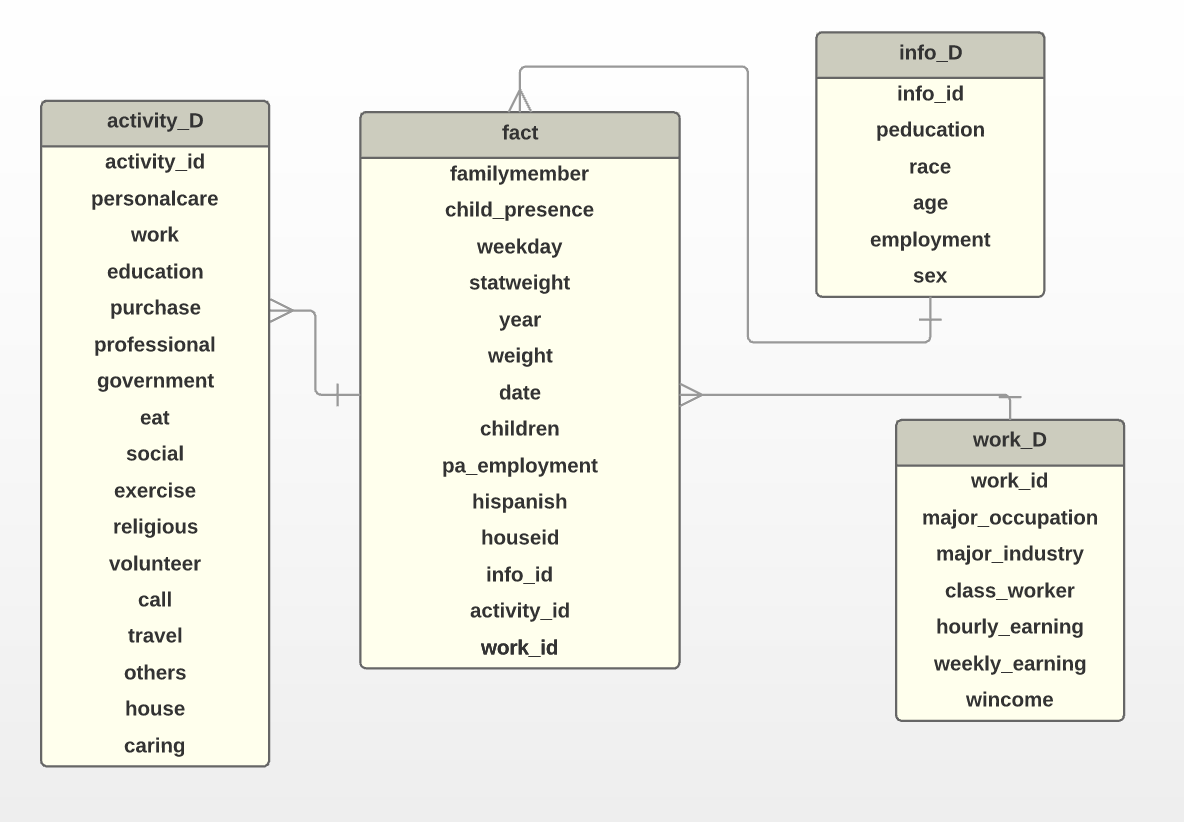

In [30]:
Image(filename = PATH + "star_schema.png", width=1000, height=1000)

## Create work dimension

In [31]:
%%sql
DROP TABLE IF EXISTS work_D CASCADE;
CREATE TABLE work_D AS
    SELECT DISTINCT
    major_industry,
    major_occupation,
    class_worker,
    wincome,
    hourly_earning,
    weekly_earning
FROM final;

Done.
26368 rows affected.


[]

In [32]:
%%sql
ALTER TABLE work_D
ADD COLUMN work_id SERIAL PRIMARY KEY;

Done.


[]

In [33]:
%%sql
select * from work_D LIMIT 5

5 rows affected.


major_industry,major_occupation,class_worker,wincome,hourly_earning,weekly_earning,work_id
8,4,4,unknown,unknown,119230,1
4,9,4,unknown,1100,52300,2
10,2,7,71840,unknown,unknown,3
10,2,5,unknown,2123,75000,4
11,3,4,46000,1250,50000,5


## Create information Dimension 

In [34]:
%%sql
DROP TABLE IF EXISTS info_D CASCADE;
CREATE TABLE info_D AS
    SELECT DISTINCT
    peducation,
    race,
    age,
    employment,
    sex
FROM final;

Done.
8330 rows affected.


[]

In [35]:
%%sql
ALTER TABLE info_D
ADD COLUMN info_id SERIAL PRIMARY KEY;

Done.


[]

In [36]:
%%sql
select * from info_D LIMIT 5

5 rows affected.


peducation,race,age,employment,sex,info_id
41,2,26,4,1,1
35,1,38,5,2,2
44,1,23,2,2,3
38,1,66,5,2,4
44,6,45,1,1,5


## Create activity dimension 

In [37]:
%%sql
DROP TABLE IF EXISTS act_D CASCADE;
CREATE TABLE act_D AS
    SELECT DISTINCT
    personalcare,
    work,
    education,
    purchase,
    professional,
    government,
    eat,
    social,
    exercise,
    religious,
    volunteer,
    call,
    travel,
    others,
    house,
    caring
FROM final;

Done.
45978 rows affected.


[]

In [38]:
%%sql
ALTER TABLE act_D
ADD COLUMN act_id SERIAL PRIMARY KEY;

Done.


[]

In [39]:
%%sql
select * from act_D LIMIT 5

5 rows affected.


personalcare,work,education,purchase,professional,government,eat,social,exercise,religious,volunteer,call,travel,others,house,caring,act_id
660,0,0,0,0,0,30,690,0,0,0,0,0,60,0,0,1
765,0,0,160,0,0,15,0,0,115,210,0,85,0,90,0,2
465,0,0,105,0,0,10,660,0,70,0,0,50,60,20,0,3
500,0,0,15,0,0,164,206,123,0,0,5,52,0,375,0,4
690,0,0,0,0,0,120,610,0,0,0,0,20,0,0,0,5


## Create a fact

We connected each dimension table with the fact table one at a time. We updated the fact tables everytime we connected one dimension table, so three updated version of fact tables are listed below and fact3 is the final fact table we were going to use in the further data exploration. 

Create first version of fact table (fact1) by selecting select columns of the joins of fact table and the work dimension table. 

In [40]:
%%sql
DROP TABLE IF EXISTS fact1;
CREATE TABLE fact1 AS
(
SELECT f.houseid, f.peducation, f.hispanish, f.race, f.age, f.employment, f.sex, f.pa_employment, f.children, f.date, f.weight, f.year, f.personalcare, f.work, f.education, f.purchase, f.professional,f.government, f.eat, f.social, f.exercise, f.religious, f.volunteer, f.call, f.travel, f.others, f.house, f.caring,f.familymember, f.child_presence, f.weekday, f.statweight, d.work_id
FROM (SELECT * FROM work_D) AS d
INNER JOIN (SELECT * FROM final) AS f
ON d.major_industry = f.major_industry
AND d.major_occupation = f.major_occupation
AND d.class_worker = f.class_worker 
AND d.wincome = f.wincome
AND d.hourly_earning = f.hourly_earning
AND d.weekly_earning = f.weekly_earning
    )
;

Done.
46325 rows affected.


[]

Create second version of fact table (fact2) by selecting select columns of the joins of fact table 1 and the activity dimension table.

In [41]:
%%sql
DROP TABLE IF EXISTS fact2;
CREATE TABLE fact2 AS
(
SELECT f.houseid, f.peducation, f.hispanish, f.race, f.age, f.employment, f.sex, f.pa_employment, f.children, f.date, f.weight, f.year,  f.house, f.caring, f.familymember, f.child_presence, f.weekday, f.statweight,f.work_id, d.act_id
FROM (SELECT * FROM act_D) AS d
INNER JOIN (SELECT * FROM fact1) AS f
ON d.personalcare = f.personalcare
AND d.work = f.work
AND d.education = f.education
AND d.purchase = f.purchase
AND d.professional = f.professional
AND d.government = f.government
AND d.eat = f.eat
AND d.social = f.social
AND d.exercise= f.exercise
AND d.religious = f.religious
AND d.volunteer = f.volunteer
AND d.call = f.call
AND d.travel = f.travel
AND d.others = f.others
AND d.house = f.house
AND d.caring = f.caring
    )
;

Done.
46325 rows affected.


[]

Create second version of fact table (fact3) by selecting select columns of the joins of fact table 2 and the information dimension table.

In [42]:
%%sql
DROP TABLE IF EXISTS fact3;
CREATE TABLE fact3 AS
(
SELECT f.houseid,  f.hispanish, f.pa_employment, f.children, f.date, f.weight, f.year, f.familymember, f.child_presence, f.weekday, f.statweight, f.work_id, f.act_id, d.info_id
FROM (SELECT * FROM info_D) AS d
INNER JOIN (SELECT * FROM fact2) AS f
ON d.peducation = f.peducation
AND d.race = f.race
AND d.age= f.age
AND d.employment = f.employment
AND d.sex = f.sex
    )
;

Done.
46325 rows affected.


[]

In [43]:
%%sql
ALTER TABLE fact3
ADD FOREIGN KEY (info_id) REFERENCES info_D(info_id),
ADD FOREIGN KEY (work_id) REFERENCES work_D(work_id),
ADD FOREIGN KEY (act_id) REFERENCES act_D(act_id);

Done.


[]

In [44]:
%%sql
SELECT * from fact3
LIMIT 10;

10 rows affected.


houseid,hispanish,pa_employment,children,date,weight,year,familymember,child_presence,weekday,statweight,work_id,act_id,info_id
2.01408E+13,1,1,2,2,20800000.0,2014,1,2,7,5601510.0,13250,30226,3840
2.01311E+13,1,1,2,6,20100000.0,2013,1,2,5,12200000.0,237,29027,167
2.0121E+13,1,unknown,0,3,10100000.0,2012,1,2,6,11300000.0,398,45261,2341
2.01504E+13,2,1,1,5,8195303.0,2015,1,2,7,1822459.0,17513,23600,1597
2.01302E+13,1,2,3,3,12700000.0,2013,1,1,6,5763428.0,20816,22249,6819
2.01303E+13,1,2,3,4,12100000.0,2013,1,1,7,3143433.0,3810,8575,2720
2.01512E+13,1,2,1,1,5751254.0,2015,1,2,7,4841233.0,18279,8779,2720
2.01502E+13,1,1,2,2,8697665.0,2015,1,2,7,1522156.0,10954,28757,1258
2.01204E+13,1,1,0,4,12500000.0,2012,1,1,7,4369390.0,4436,12017,1596
2.01407E+13,1,unknown,4,4,10300000.0,2014,1,1,6,16800000.0,14743,28421,3347


# Explore the Star Schema

## Question1: What is the daily activity for the employer related to Computer science in finanical industry?

Since we are interested in the activity that Americans spend on daily per minutes. First we took a look what is inside the activity table. A detailed explaination of each activity sub-catergories can be found at: http://www.bls.gov/tus/lexiconnoex0315.pdf

The 18 categories may sounds ambiguous, for example, personalcare covers sleeping, grooming, personal care. Sleeping is the largest components of this catergories. Thus sleeping is the reprsentative activity of category "Personal care". The same logic applis to the rest of the activities.

In [45]:
%%sql
SELECT *
FROM act_D
WHERE act_id IN (
SELECT act_id
FROM fact3
GROUP BY act_id
ORDER BY COUNT(*) DESC
LIMIT 10
);

10 rows affected.


personalcare,work,education,purchase,professional,government,eat,social,exercise,religious,volunteer,call,travel,others,house,caring,act_id
720,0,0,0,0,0,60,660,0,0,0,0,0,0,0,0,20443
570,0,0,0,0,0,60,810,0,0,0,0,0,0,0,0,8295
1410,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,9748
720,0,0,0,0,0,30,690,0,0,0,0,0,0,0,0,25330
540,0,0,0,0,0,30,870,0,0,0,0,0,0,0,0,43962
1380,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,4843
540,0,0,0,0,0,60,840,0,0,0,0,0,0,0,0,5469
690,0,0,0,0,0,60,690,0,0,0,0,0,0,0,0,98
840,0,0,0,0,0,60,540,0,0,0,0,0,0,0,0,4370
660,0,0,0,0,0,60,720,0,0,0,0,0,0,0,0,12048


Next, we calucalted the avgerage of each activities that American spend time on and rounded it to a whole number. 

Within a day, American approximately spend 580 minutes on sleeping, 302 minutes on social, 156 minutes on work. However, the problem with this result was that this average applied to both employed and unemployed survey respondents, the average time American spend on work is 156 minuters per day, this does not sound reasonable.

In [46]:
%%sql 
SELECT 
ROUND(AVG(personalcare)) as "personalcare",  ROUND(AVG(work)) as "work",  ROUND(AVG(education)) as "education",  ROUND(AVG(purchase)) as "purchase",  ROUND(AVG(professional)) as "professional",  ROUND(AVG(government)) as "government",  ROUND(AVG(eat)) as "eat", ROUND(AVG(social)) as "social", ROUND(AVG(exercise)) as "exercise",  ROUND(AVG(religious)) as "religious",  ROUND(AVG(volunteer)) as "volunteer",  ROUND(AVG(call)) as "call",  ROUND(AVG(travel)) as "travel",  ROUND(AVG(others)) as "others",  ROUND(AVG(house)) as "house",  ROUND(AVG(caring)) as "caring"
FROM fact3, act_D
WHERE fact3.act_id = act_D.act_id
;

1 rows affected.


personalcare,work,education,purchase,professional,government,eat,social,exercise,religious,volunteer,call,travel,others,house,caring
580,156,15,25,5,0,67,302,19,13,9,7,70,13,120,41


To be improved based on last query, we have added in employment status into the quries, the employment status can be found under work_D. 

1: Employed-at work

2: Employed-absent

3: Unemployed - on layoff

4: Unemployed - looking

5: Not in labor force

In this query, we only look for the time spend by employed repondents regardless of the job type. The working time increased

In [47]:
%%sql 
SELECT 
ROUND(AVG(personalcare)) as "personalcare",  ROUND(AVG(work)) as "work",  ROUND(AVG(education)) as "education",  ROUND(AVG(purchase)) as "purchase",  ROUND(AVG(professional)) as "professional",  ROUND(AVG(government)) as "government",  ROUND(AVG(eat)) as "eat", ROUND(AVG(social)) as "social", ROUND(AVG(exercise)) as "exercise",  ROUND(AVG(religious)) as "religious",  ROUND(AVG(volunteer)) as "volunteer",  ROUND(AVG(call)) as "call",  ROUND(AVG(travel)) as "travel",  ROUND(AVG(others)) as "others",  ROUND(AVG(house)) as "house",  ROUND(AVG(caring)) as "caring"
FROM fact3, act_D,info_D
WHERE fact3.act_id = act_D.act_id
AND fact3.info_id = info_D.info_id
AND employment ='1' 
;

1 rows affected.


personalcare,work,education,purchase,professional,government,eat,social,exercise,religious,volunteer,call,travel,others,house,caring
560,264,9,25,3,0,66,236,20,10,8,5,78,10,104,40


Now we want to dig dipper to see how the average work time differ for people working in IT industry and computer science related occupations, just like us. The result we get is convincing as the average working time for people working in IT industry and computer science related occupations is almost as twice as the average working time all of employed people.
We also noticed that the average eating time decreased from 66 minutes to 49 minutes, almost decrease by 1/4; the average housework time decreased from 104 minutes to 50 minutes, more than 1/2; and social time decreased from 236 minutes to 143 minutes, which decreased by 1/3. It seems that people in IT industry put more weight on working in the work-life tradeoff and thus the living quality of IT workers may still need to be improved.

In [48]:
%%sql 
SELECT 
ROUND(AVG(personalcare)) as "personalcare",  ROUND(AVG(work)) as "work",  ROUND(AVG(education)) as "education",  ROUND(AVG(purchase)) as "purchase",  ROUND(AVG(professional)) as "professional",  ROUND(AVG(government)) as "government",  ROUND(AVG(eat)) as "eat", ROUND(AVG(social)) as "social", ROUND(AVG(exercise)) as "exercise",  ROUND(AVG(religious)) as "religious",  ROUND(AVG(volunteer)) as "volunteer",  ROUND(AVG(call)) as "call",  ROUND(AVG(travel)) as "travel",  ROUND(AVG(others)) as "others",  ROUND(AVG(house)) as "house",  ROUND(AVG(caring)) as "caring"
FROM fact3, act_D,work_D, info_D
WHERE fact3.act_id = act_D.act_id
AND fact3.work_id = work_D.work_id
AND fact3.info_id = info_D.info_id
AND employment ='1' 
AND major_occupation ='3' and major_industry ='7'
;

1 rows affected.


personalcare,work,education,purchase,professional,government,eat,social,exercise,religious,volunteer,call,travel,others,house,caring
579,468,0,16,0,0,49,143,19,0,0,0,111,0,50,6


## Question2: How does the race distribute among all respondents?

Now we want to take a look at the race distribution at workplace, and here isthe explainations for each coding number.

In [49]:
from IPython.display import Image
PATH = "/home/jovyan/work/"

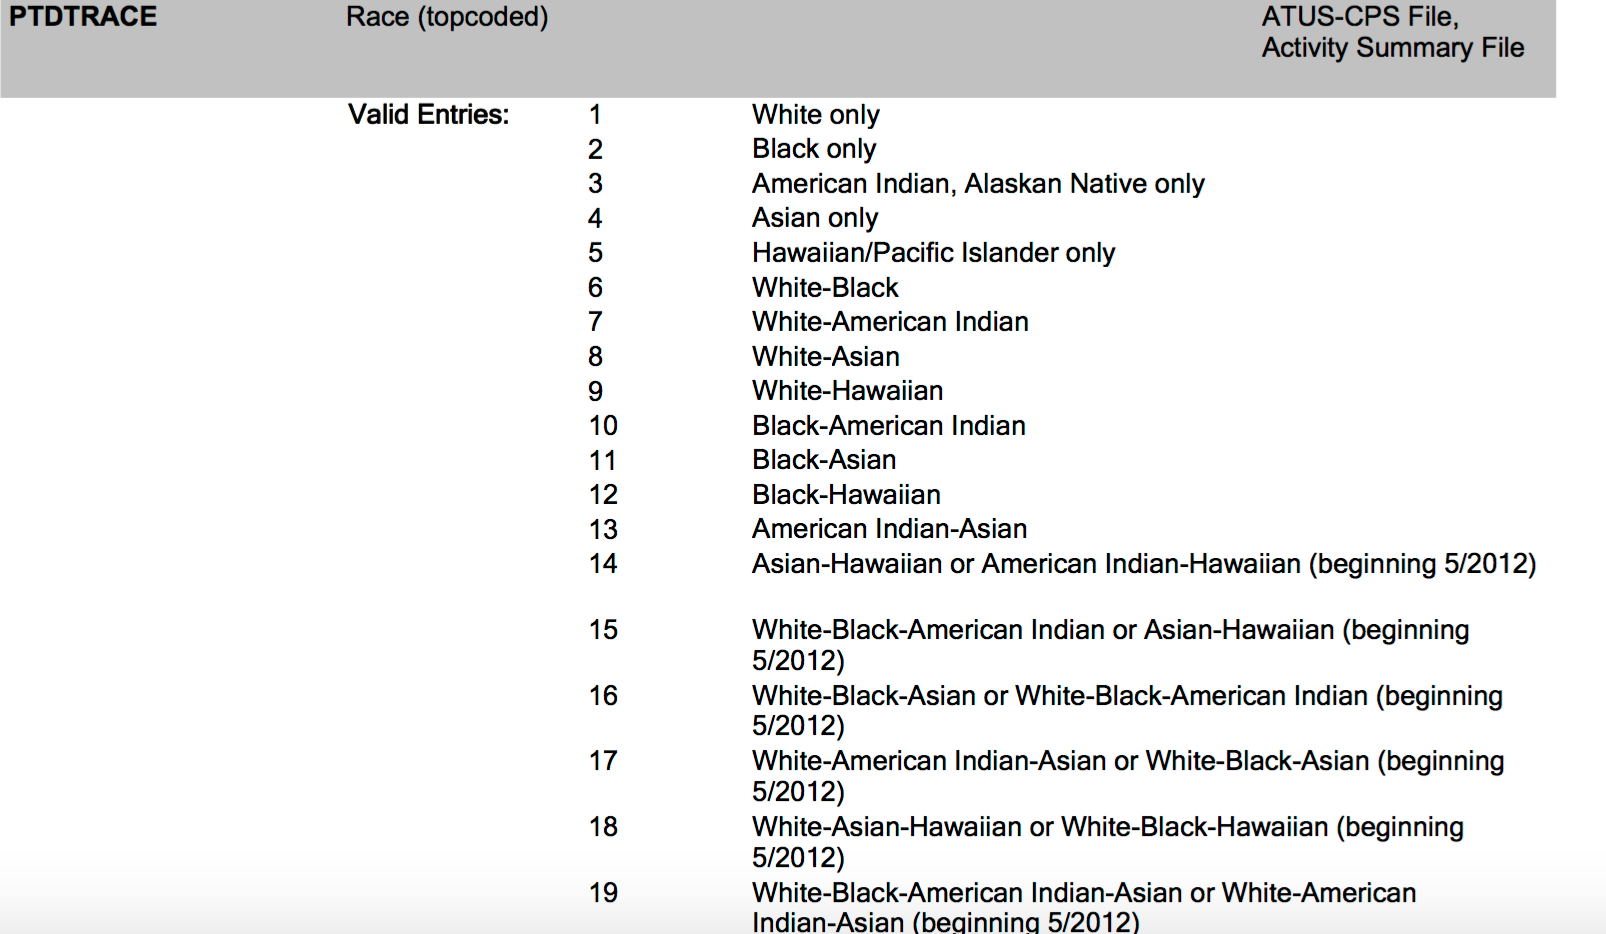

In [50]:
Image(filename = PATH + "race.png", width=1000, height=1000)

We first counted the number of respondent for the each race and ordered all the races by the count.

In [51]:
%%sql
SELECT race, COUNT(*) FROM (
    SELECT d.race
    FROM info_D AS d, fact3 AS f
    WHERE d.info_id = f.info_id
    ) AS count
GROUP BY race
ORDER BY count DESC
LIMIT 19
;

19 rows affected.


race,count
1,36518
2,6926
4,1843
3,327
7,276
6,128
5,105
8,95
10,33
16,17


We then want to see how is the race distribution among those who are currently employed. 

In [64]:
%%sql
SELECT race, COUNT(*) FROM (
    SELECT d.race
    FROM info_D AS d, fact3 AS f
    WHERE d.info_id = f.info_id
    AND employment ='1'
    ) AS count
GROUP BY race
ORDER BY count DESC
LIMIT 10
;

10 rows affected.


race,count
1,21499
2,3517
4,1194
3,191
7,136
6,77
5,75
8,49
10,22
9,9


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


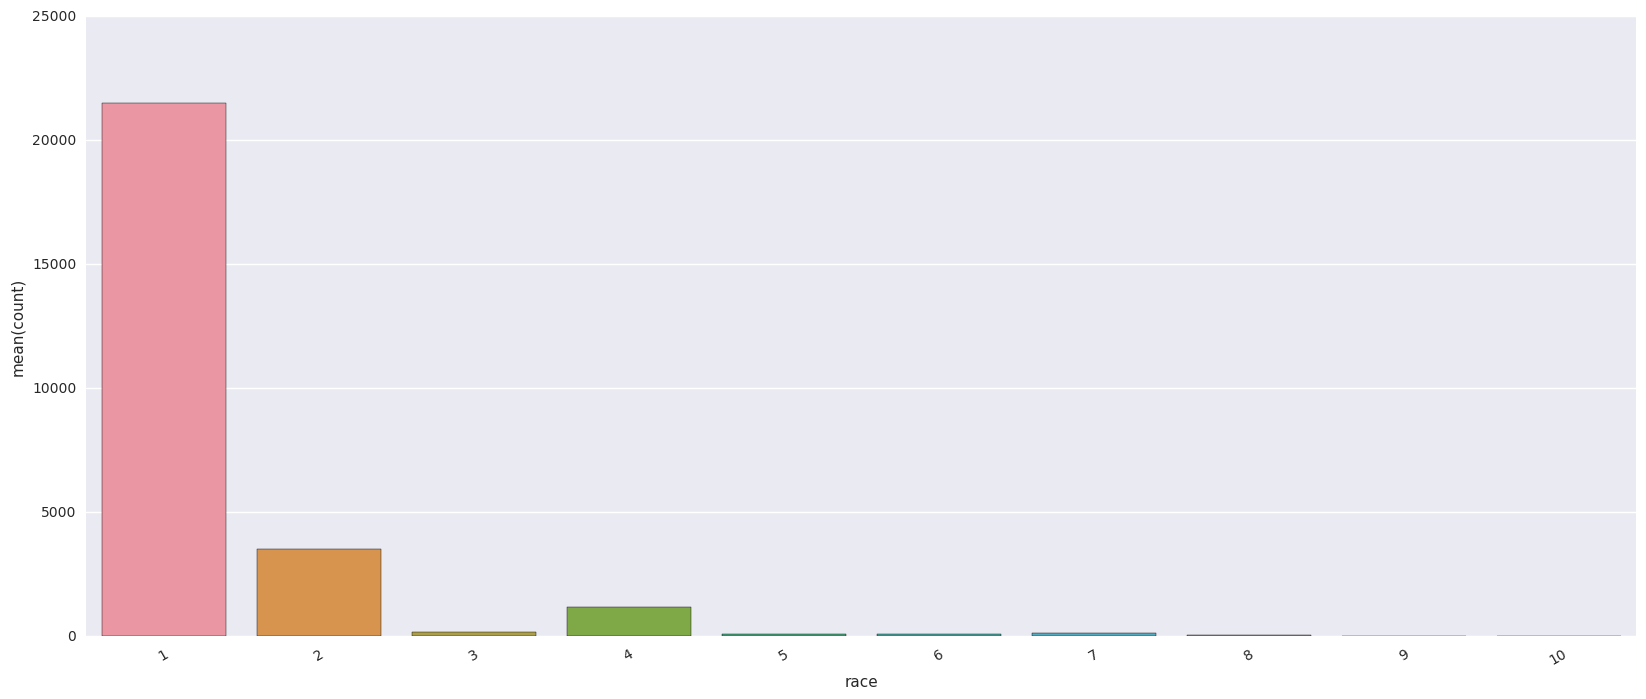

In [53]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc

d = _.DataFrame()
rc('figure', figsize=(20, 8))
splt = sns.barplot(x='race', y='count', data=d)
labels = [l for l in splt.get_xmajorticklabels()]
splt.set_xticklabels(labels, rotation=30)

([<matplotlib.patches.Wedge at 0x7f19ae06f630>,
  <matplotlib.text.Text at 0x7f19ae097e48>])

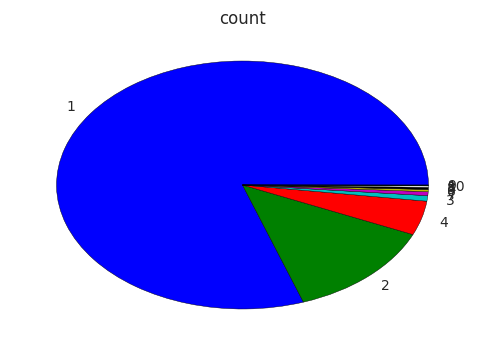

In [65]:
%matplotlib inline
result = _
result.pie()

# BONUES PART

In this part we found a new data base called ATUS WB Module Data, it shares same houseid for each respondent as our earlier used dataset ATUS. We choose American Time Use Survey—2013 Well-Being Module Microdata Files to use as a complementary dataset.

This new dataset contains information of the health statues of each respondent, and we would like to use this, together with the ealier dataset of ATUS to learn about how people of different health statues will choose their daily activities.

All information about the survey and dataset can be found here: http://www.bls.gov/tus/wbdatafiles.htm

The ATUS WB Module Data is in .dat form, so we first load it into a pandas dataframe using the following code:

In [22]:
reswb = pd.read_csv('wbresp_1013.dat', header=None,sep=',',skiprows=1)

Rename the columns according to the ATUS WB user's guide to make them easier understanding.

In [23]:
heading=['tucaseid','familymember','life','healthstatues','hypertension','pain','rested','feelings','time','bodyweight',
        'allocation','allocation2','allocation3','allocation4','allcation5','allocation6']
reswb.columns=heading
reswb

,tucaseid,familymember,life,healthstatues,hypertension,pain,rested,feelings,time,bodyweight,allocation,allocation2,allocation3,allocation4,allcation5,allocation6
0,20100101100019,1,-1,2,2,2,2,-1,1035,1.501833e+06,-1,0,0,0,0,-1
1,20100101100020,1,-1,4,2,1,3,-1,664,2.794063e+06,-1,0,0,0,0,-1
2,20100101100045,1,-1,3,2,2,1,-1,743,1.706229e+07,-1,0,0,0,0,-1
3,20100101100050,1,-1,4,1,2,2,-1,630,7.953039e+06,-1,0,0,0,0,-1
4,20100101100053,1,-1,2,2,2,2,-1,848,3.621753e+06,-1,0,0,0,0,-1
5,20100101100087,1,-1,2,1,2,1,-1,866,2.686924e+07,-1,0,0,0,0,-1
6,20100101100095,1,-1,3,1,2,1,-1,990,2.384881e+06,-1,0,0,0,0,-1
7,20100101100098,1,-1,4,2,2,3,-1,487,5.755545e+06,-1,0,0,0,0,-1
8,20100101100117,1,-1,5,1,1,2,-1,905,2.170024e+07,-1,0,0,0,0,-1
9,20100101100119,1,-1,3,1,2,3,-1,466,5.085905e+06,-1,0,0,0,0,-1


Among the 16 variables, we are most interested in 'houseid' and 'healthstatues', and the value of 'healthstatues' is between 1 and 5, which stand for how the respondent thinks about his/her health statues, and the meanings of the values are as below:

| health index | Description|
| -----------|------------|
|1| Excellent|
|2| Very good|
|3| Good|
|4| Fair|
|5| Poor|

To learn about how people of different health statues will choose their daily activities, we combine this dataset with the one we used earlier using houseid:

In [24]:
healthdf = pd.concat([df1_1, reswb], axis=1, join='inner')
healthdf2=healthdf.groupby(['healthstatues'],as_index=False).sum()
healthdf2

,healthstatues,tucaseid,sex,age,statweight,personalcare,work,education,purchase,professional,...,rested,feelings,time,bodyweight,allocation,allocation2,allocation3,allocation4,allcation5,allocation6
0,1,1.283069e+17,9960,307613,4.930016e+10,3685832,995017,86345,159348,31604,...,10317,4325,5561265,5.049292e+10,-2013,1097,1395,557,1212,-1972
1,2,2.329872e+17,17969,559527,8.796624e+10,6701541,1807951,175619,278057,50889,...,20221,9042,10103185,9.125178e+10,-2943,1771,2111,850,2213,-2992
2,3,2.095163e+17,16207,502082,8.123917e+10,6011791,1643838,158486,250103,45258,...,19706,8585,8972596,8.203038e+10,-1951,1479,2278,896,2758,-1996
3,4,9.479276e+16,7264,229021,3.681491e+10,2722876,727085,65778,112959,20182,...,10039,3888,3968452,3.560879e+10,-819,1059,1771,555,1338,-1240
4,5,3.019479e+16,2357,71813,1.135735e+10,865913,230571,21187,32716,6563,...,3908,1206,1219098,1.065096e+10,257,211,548,213,459,-126


In [25]:
health=['Excellent','Very good','Good','Fair','Poor']
for i in range(5):
    a=i+1
    healthdf2.loc[healthdf2['healthstatues']==a, 'healthstatues'] = health[i]


In [26]:
healthdf2.drop(healthdf2[['tucaseid', 'sex', 'age', 'personalcare',
       'work', 'education', 'purchase', 'professional', 'government', 'eat',
       'social', 'exercise', 'religious', 'volunteer', 'call', 'travel',
       'others', 'house', 'caring', 'agelevel', 'familymember', 'life',
       'hypertension', 'pain', 'rested', 'feelings', 'time',
       'allocation', 'allocation2', 'allocation3', 'allocation4', 'allcation5',
       'allocation6','bodyweight']],axis=1,
           inplace=True)

In [27]:
aveactivity=['personalcare','work','education','purchase','professional','government','eat','social','exercise',
             'religious','volunteer','call','travel','others','house','caring']
for i in aveactivity:
    healthdf2['ave'+i]=healthdf2['w'+i]/healthdf2['statweight']/60
healthdf2.drop(healthdf2[['wpersonalcare','wwork','weducation','wpurchase','wprofessional','wgovernment','weat','wsocial',
                  'wexercise','wreligious','wvolunteer','wcall','wtravel','wothers','whouse','wcaring']],axis=1,
           inplace=True)

In [28]:
healthdf2

,healthstatues,statweight,avepersonalcare,avework,aveeducation,avepurchase,aveprofessional,avegovernment,aveeat,avesocial,aveexercise,avereligious,avevolunteer,avecall,avetravel,aveothers,avehouse,avecaring
0,Excellent,4.930016e+10,9.478229,3.336725,0.398825,0.355103,0.095517,0.014243,1.107070,4.750762,0.348406,0.152754,0.140669,0.102813,1.156814,0.220976,1.781032,0.560062
1,Very good,8.796624e+10,9.529814,3.222466,0.457138,0.350487,0.077740,0.008985,1.100567,4.782344,0.327917,0.141481,0.133291,0.095842,1.163254,0.235393,1.785534,0.587747
2,Good,8.123917e+10,9.521926,3.281447,0.454532,0.361203,0.082431,0.005935,1.109897,4.696976,0.333307,0.148488,0.127577,0.101135,1.171223,0.222705,1.812006,0.569211
3,Fair,3.681491e+10,9.493396,3.209054,0.418360,0.363432,0.080628,0.008661,1.121035,4.852617,0.333815,0.141216,0.132276,0.099926,1.230300,0.226761,1.713229,0.575294
4,Poor,1.135735e+10,9.497148,3.241649,0.428371,0.331626,0.082868,0.006021,1.093080,4.642704,0.382373,0.151541,0.151014,0.098926,1.197265,0.278311,1.794345,0.622760


/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2885: UserWarning: The `hline` parameter has been removed
  warnings.warn("The `hline` parameter has been removed", UserWarning)


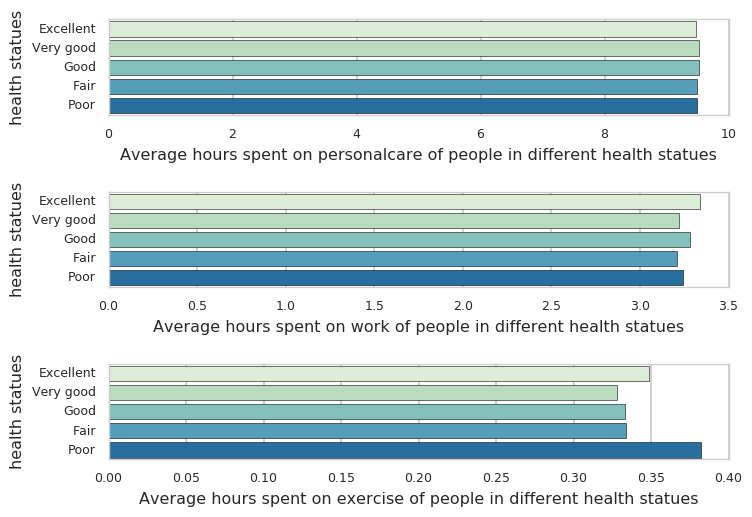

In [29]:
activities3 = ['personalcare','work','exercise']
fig = plt.figure()
healths = ['Excellent','Very good','Good','Fair','Poor']
sns.set(style="whitegrid", context="talk")

for i in range(3):
    a = 'ave'+activities3[i]
    values = array(healthdf2[a])
    temp = 310 + i + 1
    ax = plt.subplot(temp)
    b = sns.barplot(values,healths, palette = "GnBu", hline = 0, ax=ax, orient = "h")
    plt.subplots_adjust(hspace = 0.8 , top = 1.3, bottom = 0.5)
    #temp = tic.MaxNLocator(3)
    ax.tick_params(axis='both', which='major', labelsize=9)
    #ax1.set_xticklabels(xticklabels, fontsize=7)
    ax.set_xlabel('Average hours spent on '+ activities3[i] + ' of people in different health statues', size = 11.5)
    ax.set_ylabel('health statues', size = 11.5)
    ax.title.set_visible(False)

plt.show()

From the above three plots, we are some what supprised to find the people who consider their health statues to be poor spend more time on exercise than people in other groups.
Perhaps it's because people who think they have a poor health condition usually will pay more attention to health and will be more interested in doing things that will promote their health conditions.